### *2025 AI Job Market Analysis: Salaries, Skills, and Hiring Trends*

#### 🎯 *Business Problem*
*In the dynamic and fast-growing field of artificial intelligence, both companies and professionals face significant challenges in understanding global hiring trends, salary expectations, and skill demands. As AI roles continue to diversify across industries and regions, it's crucial to identify how factors such as job title, experience level, company size, employment type, remote flexibility, required skills, and educational background influence compensation and hiring patterns.*

*This project aims to analyze a global dataset of AI-related job postings from 2025 to uncover key insights on:*

- *Competitive salary ranges across roles, locations, and experience levels*
- *The impact of remote work, required skills, and education on job offers*
- *Application timelines and company-level hiring behaviors*

*The ultimate goal is to help:*

- *Organizations benchmark salaries, structure job roles, and optimize talent acquisition strategies*
- *Job seekers identify high-growth opportunities, understand skill-based compensation, and align their career planning with market demands*

*This end-to-end data analysis project covers data cleaning, feature engineering, trend analysis, and insight generation — providing a real-world foundation for AI job market intelligence.*

#### 🔧 *Tools Used* 
*Python, Pandas, Matplotlib, Seaborn*

#### *Size of Dataset 2608 KB*
#### *Key Insights*
- 📊 *15,000+ job listings analyzed*  
- 💸 *Avg Salary: $112,000 USD*  
- 🌍 *Top cities: SF, Bangalore, London*  
- 🛠️ *Top skills: ML, Python, NLP*  


#### *Author* - *Niranjan (Data Analyst)*

### *Environmental Setup*
#### *⚙️ Importing Essential Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### *Data Loading*
#### *📂 Loading the Dataset*

In [2]:
df = pd.read_csv("ai_job_dataset.csv")

### *Data Understanding*
#### *🔍Initial Data Inspection*

In [3]:
df.shape

(15000, 19)

In [4]:
df.columns.tolist()

['job_id',
 'job_title',
 'salary_usd',
 'salary_currency',
 'experience_level',
 'employment_type',
 'company_location',
 'company_size',
 'employee_residence',
 'remote_ratio',
 'required_skills',
 'education_required',
 'years_experience',
 'industry',
 'posting_date',
 'application_deadline',
 'job_description_length',
 'benefits_score',
 'company_name']

In [5]:
df.dtypes

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object

In [6]:
df.head(3)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,18-10-2024,07-11-2024,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,20-11-2024,11-01-2025,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,18-03-2025,07-04-2025,1974,9.4,Autonomous Tech


In [7]:
df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

### *Data Exploration*
#### *🔎 Analyzing Patterns & Distributions*

#### 🆔 *Job ID*
- *Data type is object*
- *All unique values*
- *We can drop the column as Id is not needed for Data Analysis*
- *No missing vlues present*
- *all unique values in this column*

In [8]:
df['job_id'].dtype

dtype('O')

In [9]:
df["job_id"].nunique()

15000

In [10]:
df["job_id"].unique()

array(['AI00001', 'AI00002', 'AI00003', ..., 'AI14998', 'AI14999',
       'AI15000'], dtype=object)

#### 🧠 *Job Title*
- *Data type is object*
- *All categories of job tittle*
- *No missing avlues present*
- *Total 20 unique values*
- *Machine Learning Researcher has the highest*
- *Some of them are repeating*
- *2nd highest is AI Software Engineer*
- *No missing values present in the column*

In [11]:
df['job_title'].dtype

dtype('O')

In [12]:
df["job_title"].nunique()

20

In [13]:
df["job_title"].unique()

array(['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'NLP Engineer', 'AI Consultant', 'AI Architect',
       'Principal Data Scientist', 'Data Analyst',
       'Autonomous Systems Engineer', 'AI Product Manager',
       'Machine Learning Engineer', 'Data Engineer', 'Research Scientist',
       'ML Ops Engineer', 'Robotics Engineer', 'Head of AI',
       'Deep Learning Engineer', 'Data Scientist',
       'Machine Learning Researcher', 'Computer Vision Engineer'],
      dtype=object)

In [14]:
df["job_title"].value_counts()

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

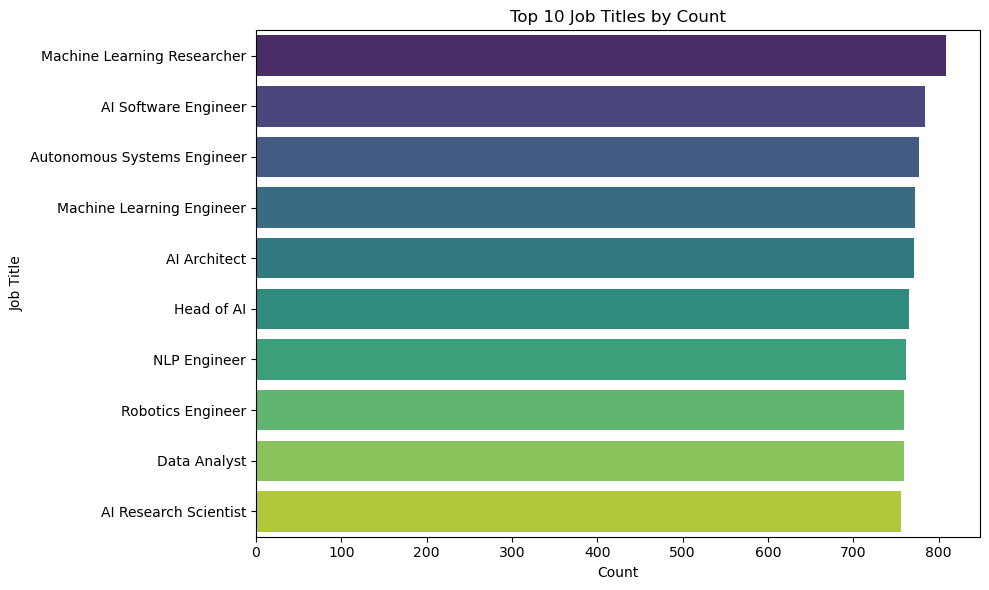

In [15]:
top_10_jobs = df['job_title'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette='viridis')
plt.title('Top 10 Job Titles by Count')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

#### 💵 *Salary usd*
- *Continous Column*
- *14315 unique values*
- *Some of the job tittles are repeating*
- *Right Skewed*
- *Outlier Present*
- *No missing values present*

In [16]:
df['salary_usd'].dtype

dtype('int64')

In [17]:
df["salary_usd"].nunique()

14315

In [18]:
df["salary_usd"].unique()

array([ 90376,  61895, 152626, ..., 189490,  79461,  56481], dtype=int64)

In [19]:
df["salary_usd"].describe()

count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64

In [20]:
df["salary_usd"].skew()

1.2527592133197596

<Axes: xlabel='salary_usd', ylabel='Count'>

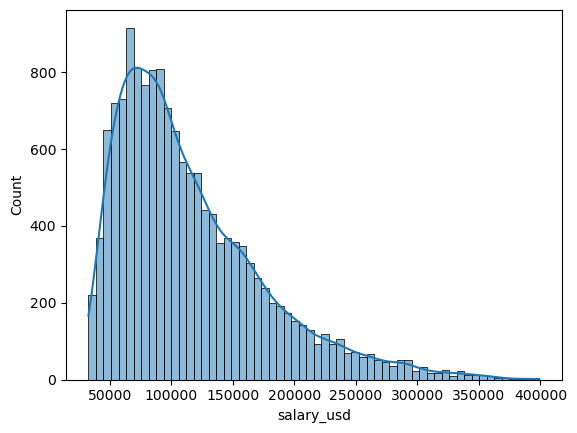

In [21]:
sns.histplot(data = df, x = "salary_usd", kde = True)

<Axes: xlabel='salary_usd'>

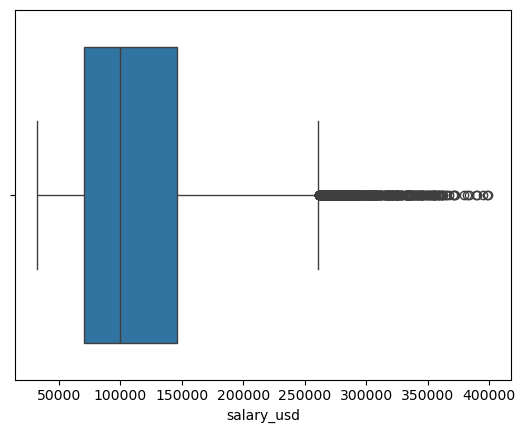

In [22]:
sns.boxplot(data = df, x = "salary_usd")

#### 💵 *Salary currency*
- *Data type is object*
- *3 unique values*
- *Categorical Column*
- *USD is the highest*
- *Great Britain Pound is the lowest*
- *No missing values present in the column*

In [23]:
df['salary_currency'].dtype

dtype('O')

In [24]:
df['salary_currency'].nunique()

3

In [25]:
df['salary_currency'].unique()

array(['USD', 'EUR', 'GBP'], dtype=object)

In [26]:
df['salary_currency'].value_counts()

salary_currency
USD    11957
EUR     2314
GBP      729
Name: count, dtype: int64

<Axes: xlabel='salary_currency', ylabel='count'>

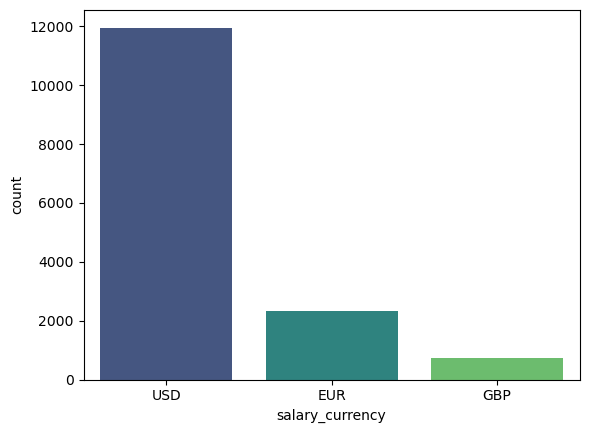

In [27]:
sns.countplot(x='salary_currency', data = df ,palette = "viridis")

#### 📈 *Experience level*
- *Data type is object*
- *4 distinct unique categories*
- *Highest employee is 	Mid-level (experienced but not senior)*
- *Lowest is entry level*
- *No missing values present*

In [28]:
df['experience_level'].dtype

dtype('O')

In [29]:
df['experience_level'].nunique()

4

In [30]:
df['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [31]:
df['experience_level'].value_counts()

experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

<Axes: xlabel='experience_level', ylabel='count'>

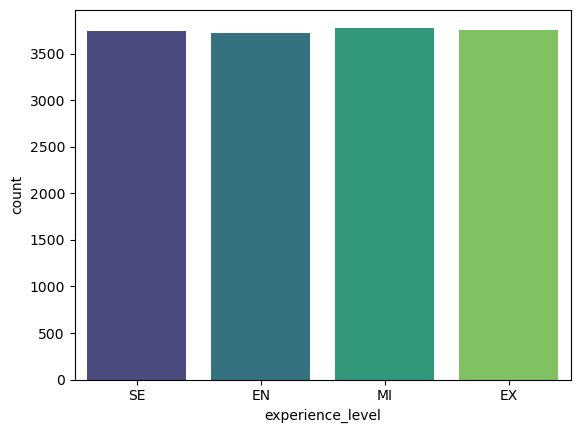

In [32]:
sns.countplot(x='experience_level', data = df,palette = "viridis")

#### 👔 *Employment type*
- *Data type is object*
- *Categorical column*
- *4 unique categories*
- *Full - time employement is the highest*
- *Part - Time employment is the lowest*
- *No missing values present in the data set*

In [33]:
df['employment_type'].dtype

dtype('O')

In [34]:
df['employment_type'].nunique()

4

In [35]:
df['employment_type'].unique()

array(['CT', 'FL', 'PT', 'FT'], dtype=object)

In [36]:
df['employment_type'].value_counts()

employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64

<Axes: xlabel='employment_type', ylabel='count'>

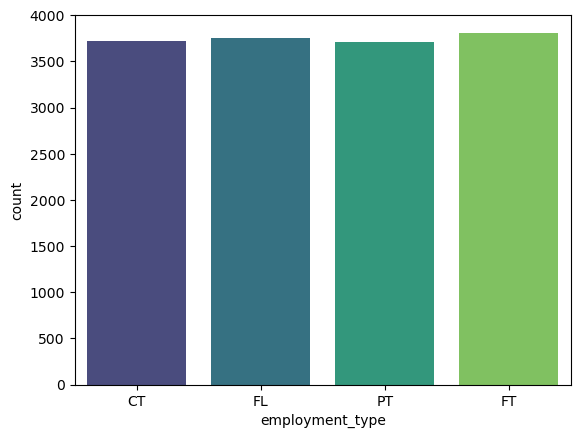

In [37]:
sns.countplot(x='employment_type', data=df,palette = "viridis")

#### 🌍 *Company location*
- *Data type is object*
- *20 unique locations*
- *20 Company Locations*
- *Germany is the highest among them*
- *Norway is the lowest among them*
- *No missing values present in the data set*

In [38]:
df['company_location'].dtype

dtype('O')

In [39]:
df['company_location'].nunique()

20

In [40]:
df['company_location'].unique()

array(['China', 'Canada', 'Switzerland', 'India', 'France', 'Germany',
       'United Kingdom', 'Singapore', 'Austria', 'Sweden', 'South Korea',
       'Norway', 'Netherlands', 'United States', 'Israel', 'Australia',
       'Ireland', 'Denmark', 'Finland', 'Japan'], dtype=object)

In [41]:
df['company_location'].value_counts()

company_location
Germany           814
Denmark           778
France            769
Canada            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Finland           733
Japan             733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64

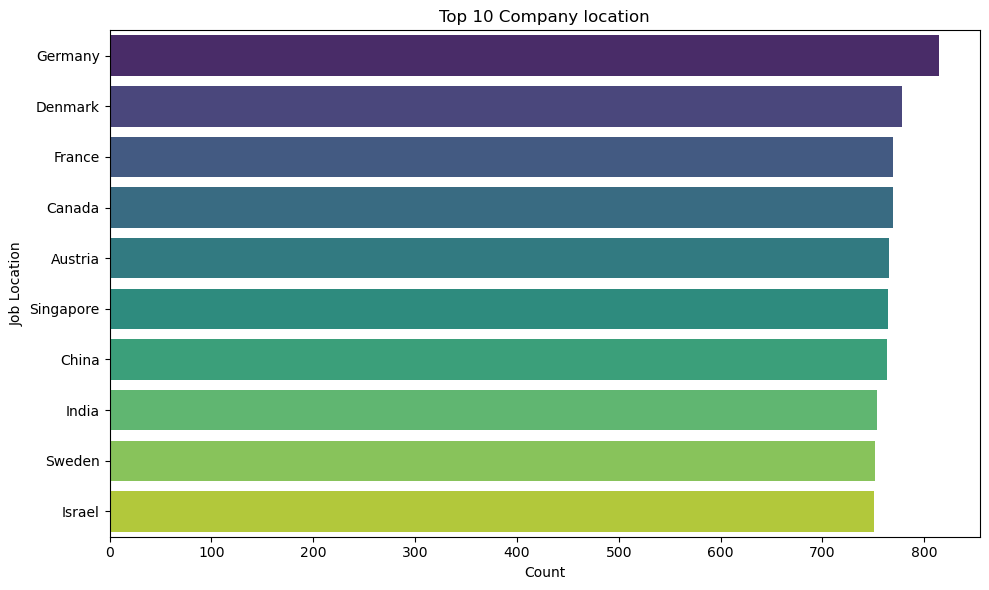

In [42]:
top_10_jobs = df['company_location'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette='viridis')
plt.title('Top 10 Company location')
plt.xlabel('Count')
plt.ylabel('Job Location')
plt.tight_layout()
plt.show()

#### 🌍 *Company size*
- *Data type is object*
- *4 unique values or catgeries*
- *Categorical colummn*
- *Categorical column*
- *Data Type object*
- *Comany size is small is the highest*
- *No missing values present in the data set*

In [43]:
df['company_size'].dtype

dtype('O')

In [44]:
df['company_size'].nunique()

3

In [45]:
df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [46]:
df['company_size'].value_counts()

company_size
S    5007
L    4998
M    4995
Name: count, dtype: int64

<Axes: xlabel='company_size', ylabel='count'>

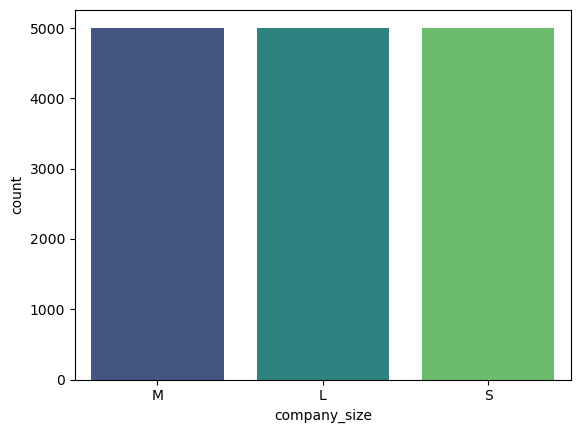

In [47]:
sns.countplot(x='company_size', data=df,palette = "viridis")

#### 🧑‍💼 *Employee residence*
- *Data type is object*
- *20 unique employees residencr locations*
- *Data Type object*
- *Most employees are from sweeden*
- *Japan is the lowest*
- *No missing values present in the data set*

In [48]:
df['employee_residence'].dtype

dtype('O')

In [49]:
df['employee_residence'].nunique()

20

In [50]:
df['employee_residence'].unique()

array(['China', 'Ireland', 'South Korea', 'India', 'Singapore', 'Germany',
       'United Kingdom', 'France', 'Austria', 'Sweden', 'Norway',
       'Israel', 'United States', 'Netherlands', 'Denmark', 'Switzerland',
       'Finland', 'Japan', 'Canada', 'Australia'], dtype=object)

In [51]:
df['employee_residence'].value_counts()

employee_residence
Sweden            790
France            781
Denmark           777
Austria           776
India             772
Germany           769
South Korea       763
Canada            762
China             761
Netherlands       758
United Kingdom    750
Switzerland       748
Singapore         740
Ireland           740
Israel            731
Australia         730
Norway            726
United States     716
Finland           710
Japan             700
Name: count, dtype: int64

#### 🌐 *Remote ratio*
- *Int data type*
- *Categorical column*
- *3 Categories present in the data set*
- *No missing values present in the data set*
- *Large number are on Fully Onsite (No remote work)*

In [52]:
df['remote_ratio'].dtype

dtype('int64')

In [53]:
df['remote_ratio'].nunique()

3

In [54]:
df['remote_ratio'].unique()

array([ 50, 100,   0], dtype=int64)

In [55]:
df['remote_ratio'].value_counts()

remote_ratio
0      5075
50     5005
100    4920
Name: count, dtype: int64

#### 🧑‍🔬 *Required skills*
- *Data Type is object*
- *Python, TensorFlow, PyTorch*
- *No missing values present in the data set*
- *13663 unique skills in the data set*

In [56]:
df['required_skills'].dtype

dtype('O')

In [57]:
df['required_skills'].nunique()

13663

In [58]:
df['required_skills'].unique()

array(['Tableau, PyTorch, Kubernetes, Linux, NLP',
       'Deep Learning, AWS, Mathematics, Python, Docker',
       'Kubernetes, Deep Learning, Java, Hadoop, NLP', ...,
       'Scala, Spark, NLP', 'Java, Computer Vision, Python, TensorFlow',
       'Scala, Azure, Deep Learning, GCP, Mathematics'], dtype=object)

In [59]:
df['required_skills'].value_counts()

required_skills
Python, TensorFlow, PyTorch                            17
Python, TensorFlow, Tableau                             9
Python, TensorFlow, MLOps                               7
Python, TensorFlow, Data Visualization                  7
Python, TensorFlow, Linux                               7
                                                       ..
Mathematics, Git, Spark                                 1
TensorFlow, SQL, NLP, Python, Scala                     1
Kubernetes, Statistics, Scala, GCP, Computer Vision     1
Scala, Kubernetes, MLOps, Python, Azure                 1
Scala, Azure, Deep Learning, GCP, Mathematics           1
Name: count, Length: 13663, dtype: int64

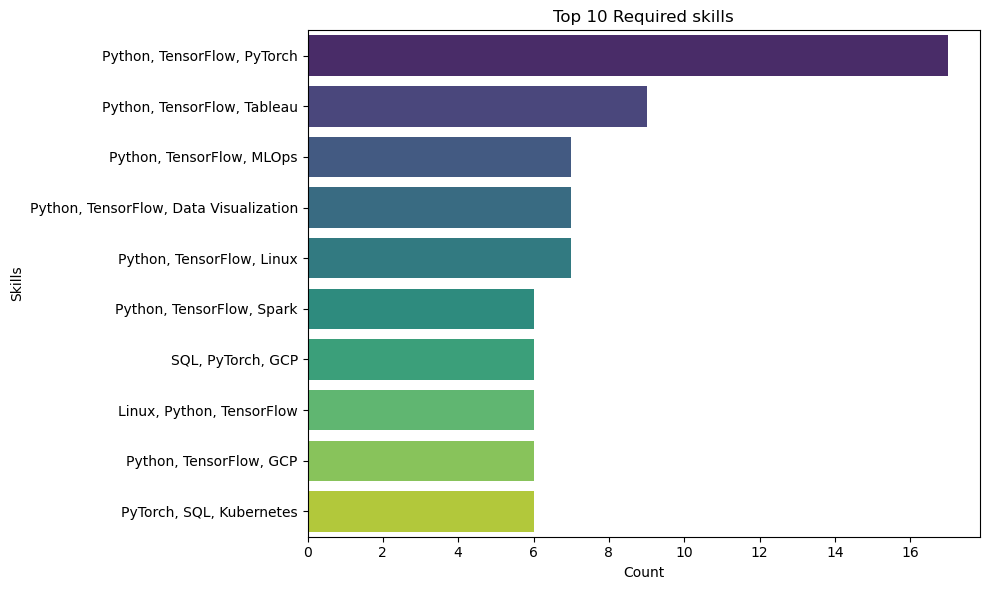

In [60]:
top_10_jobs = df['required_skills'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette='viridis')
plt.title('Top 10 Required skills')
plt.xlabel('Count')
plt.ylabel('Skills')
plt.tight_layout()
plt.show()

#### 🎓 *Education Required*
- *Data Type is object*
- *4 unique values or columns*
- *Bachelor is the highest with the numbers as 3789*
- *while phd is the lowest with 3678 numbers*
- *No missing values present*

In [61]:
df['education_required'].dtype

dtype('O')

In [62]:
df['education_required'].nunique()

4

In [63]:
df['education_required'].unique()

array(['Bachelor', 'Master', 'Associate', 'PhD'], dtype=object)

In [64]:
df['education_required'].value_counts()

education_required
Bachelor     3789
Associate    3785
Master       3748
PhD          3678
Name: count, dtype: int64

#### 🎓 *Years experience*
- *Data Type is Int*
- *20 unique values*
- *Years of experiece*
- *Most are fresher*
- *Send most highest is the employees with 1 year of experiece*
- *No missing values present in the column*
- *No outliers present*

In [65]:
df['years_experience'].dtype

dtype('int64')

In [66]:
df['years_experience'].nunique()

20

In [67]:
df['years_experience'].unique()

array([ 9,  1,  2,  7,  0,  3,  5,  8, 15,  6,  4, 16, 10, 18, 12, 19, 17,
       13, 11, 14], dtype=int64)

In [68]:
df['years_experience'].value_counts()

years_experience
0     1890
1     1828
4     1295
3     1247
2     1239
7      769
5      757
6      753
9      742
8      720
16     403
15     392
13     391
10     384
19     378
11     373
14     364
17     363
12     362
18     350
Name: count, dtype: int64

<Axes: xlabel='years_experience'>

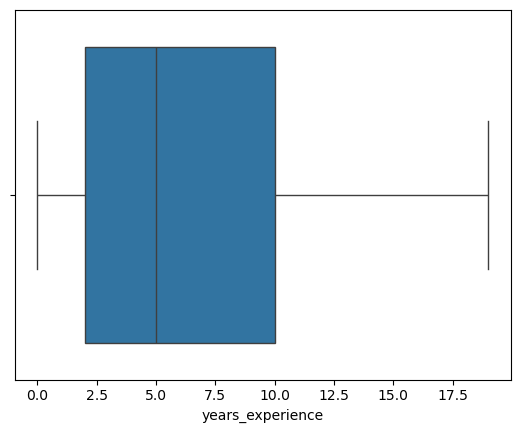

In [69]:
sns.boxplot(data = df, x = 'years_experience')

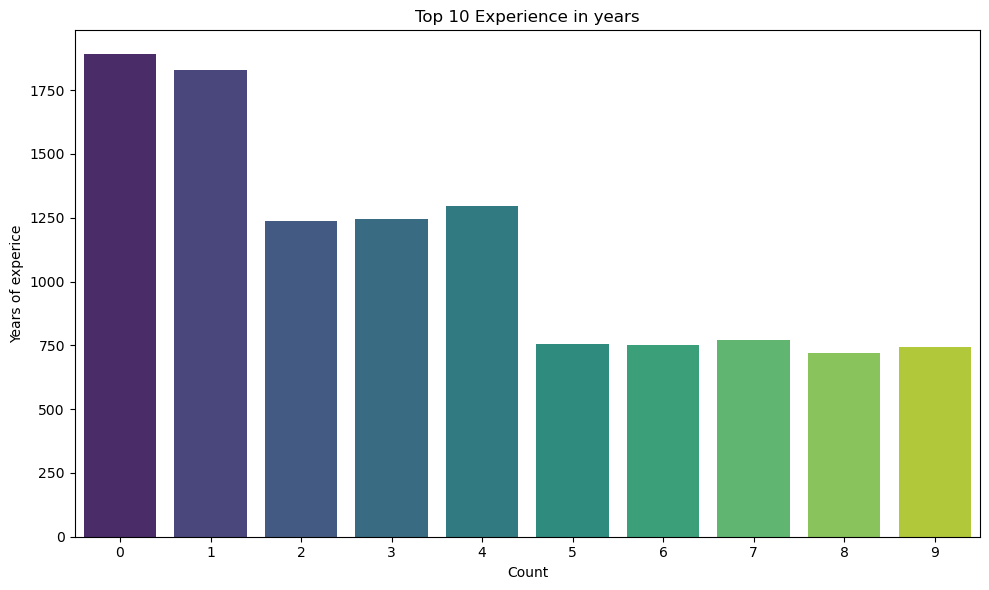

In [70]:
top_10_jobs = df['years_experience'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values, palette='viridis')
plt.title('Top 10 Experience in years')
plt.xlabel('Count')
plt.ylabel('Years of experice')
plt.tight_layout()
plt.show()

#### 🎓 *Industry*
- *Data type is object*
- *15 unique values*
- *Categorical column*
- *Highest from the retail industry*
- *Lowest is from the education industry*
- *No missing values presetn in the colummn*

In [71]:
df['industry'].dtype

dtype('O')

In [72]:
df['industry'].nunique()

15

In [73]:
df['industry'].unique()

array(['Automotive', 'Media', 'Education', 'Consulting', 'Healthcare',
       'Gaming', 'Government', 'Telecommunications', 'Manufacturing',
       'Energy', 'Technology', 'Real Estate', 'Finance', 'Transportation',
       'Retail'], dtype=object)

In [74]:
df['industry'].value_counts()

industry
Retail                1063
Media                 1045
Automotive            1020
Consulting            1020
Technology            1011
Real Estate           1007
Government             998
Healthcare             997
Telecommunications     997
Transportation         997
Finance                984
Energy                 976
Gaming                 967
Manufacturing          962
Education              956
Name: count, dtype: int64

#### 📅 *Posting date*
- *Time series column*
- *Data type is object*
- *Posting data records are from - '2024-01-01', '2025-04-30'*
- *Most of the posting date are from 2024-07-05*

In [75]:
df['posting_date'].dtype

dtype('O')

In [76]:
df['posting_date'].min(),df['posting_date'].max()

('01-01-2024', '31-12-2024')

In [77]:
df['posting_date'].value_counts().sort_index()

posting_date
01-01-2024    23
01-01-2025    21
01-02-2024    22
01-02-2025    27
01-03-2024    44
              ..
31-05-2024    34
31-07-2024    26
31-08-2024    31
31-10-2024    23
31-12-2024    34
Name: count, Length: 486, dtype: int64

#### 📅 *Application Deadline*
- *Data type is object*
- *534 unique values*
- *Records are from '2024-01-16', '2025-07-11'*
- *No missing values in the application deadline column*
- *the minimumn and maximumn application deadlines are from - '2024-01-16', '2025-07-11'*
- *Most of them have a application deadline as - 2025-01-05*

In [78]:
df['application_deadline'].dtype

dtype('O')

In [79]:
df['application_deadline'].min(),df['application_deadline'].max()

('01-01-2025', '31-12-2024')

In [80]:
df['application_deadline'].value_counts().sort_index()

application_deadline
01-01-2025    25
01-02-2024    11
01-02-2025    32
01-03-2024    22
01-03-2025    25
              ..
31-05-2025    20
31-07-2024    35
31-08-2024    29
31-10-2024    37
31-12-2024    36
Name: count, Length: 543, dtype: int64

#### 📄 *Job description length*
- *Data type is int64*
- *Total unique values is 2000*
- *highest job description is 1076 characters and the lowest is with 14999 characters with the numbers as 2492*
- *No missing values or nul values*

In [81]:
df['job_description_length'].dtype

dtype('int64')

In [82]:
df['job_description_length'].nunique()

2000

In [83]:
df['job_description_length'].unique()

array([1076, 1268, 1974, ...,  604, 1975,  723], dtype=int64)

In [84]:
df['job_description_length'].head(5)

0    1076
1    1268
2    1974
3    1345
4    1989
Name: job_description_length, dtype: int64

#### 🎁 *Benefits score*
- *Data type is float*
- *Total number of unique values is 51*
- *Categorical Columns*
- *Most benefit score is 9.9*
- *Lowest benefit score is 5.0*
- *No missing avlues in the benefit score column*

In [85]:
df['benefits_score'].dtype

dtype('float64')

In [86]:
df['benefits_score'].nunique()

51

In [87]:
df['benefits_score'].unique()

array([ 5.9,  5.2,  9.4,  8.6,  6.6,  6.3,  7.6,  9.3,  5.8,  9.9,  6.8,
        9.1,  9.8,  9.6,  8.7,  6.7, 10. ,  6.9,  7.4,  8.8,  7.7,  6. ,
        9.2,  5.3,  5.7,  7.9,  6.1,  8.1,  8. ,  5.1,  7.5,  5.5,  5.4,
        9.7,  7.2,  5.6,  9. ,  6.2,  6.5,  7.1,  9.5,  7. ,  8.2,  8.4,
        7.8,  6.4,  8.3,  8.9,  7.3,  8.5,  5. ])

In [88]:
df['benefits_score'].value_counts().sort_index()

benefits_score
5.0     139
5.1     329
5.2     296
5.3     302
5.4     302
5.5     329
5.6     314
5.7     306
5.8     294
5.9     277
6.0     285
6.1     296
6.2     285
6.3     286
6.4     309
6.5     326
6.6     289
6.7     282
6.8     301
6.9     294
7.0     281
7.1     307
7.2     284
7.3     312
7.4     301
7.5     294
7.6     307
7.7     294
7.8     276
7.9     304
8.0     293
8.1     309
8.2     262
8.3     314
8.4     282
8.5     331
8.6     316
8.7     276
8.8     309
8.9     313
9.0     325
9.1     293
9.2     334
9.3     304
9.4     308
9.5     273
9.6     281
9.7     292
9.8     304
9.9     338
10.0    142
Name: count, dtype: int64

<Axes: xlabel='benefits_score'>

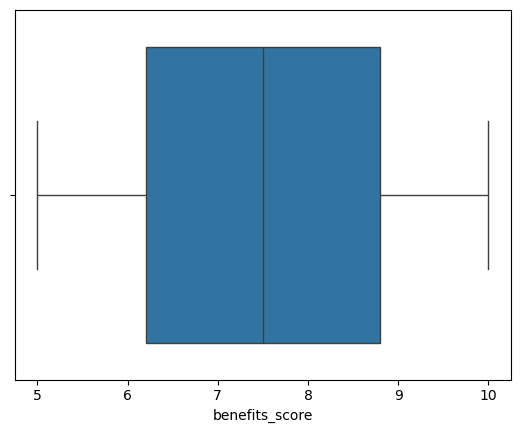

In [89]:
sns.boxplot(data = df, x = 'benefits_score')

#### 🏢 *Company name*
- *Data Type is object*
- *51 unique values*
- *Most of the records are from TechCorp Inc*
- *Algorithmic Solutions have the lowest numbers of records*

In [90]:
df['company_name'].dtype

dtype('O')

In [91]:
df['company_name'].nunique()

16

In [92]:
df['company_name'].unique()

array(['Smart Analytics', 'TechCorp Inc', 'Autonomous Tech',
       'Future Systems', 'Advanced Robotics', 'Neural Networks Co',
       'DataVision Ltd', 'Cloud AI Solutions', 'Quantum Computing Inc',
       'Predictive Systems', 'AI Innovations', 'Algorithmic Solutions',
       'Cognitive Computing', 'DeepTech Ventures',
       'Machine Intelligence Group', 'Digital Transformation LLC'],
      dtype=object)

In [93]:
df['company_name'].value_counts()

company_name
TechCorp Inc                  980
Cognitive Computing           972
AI Innovations                964
Digital Transformation LLC    961
Future Systems                960
Quantum Computing Inc         960
Cloud AI Solutions            951
Predictive Systems            947
Smart Analytics               927
Advanced Robotics             925
Neural Networks Co            922
Machine Intelligence Group    922
Autonomous Tech               918
DataVision Ltd                909
DeepTech Ventures             897
Algorithmic Solutions         885
Name: count, dtype: int64

### *Data Cleaning*
#### *🔧 Preprocessing & Imputation*

#### *Droping columns that are not necessary for the data analysis as per the business problem*

In [94]:
# List of columns to drop
cols_to_drop = [
    'job_id',
    'salary_currency',
    'job_description_length'
]

# Drop the columns
df.drop(columns=cols_to_drop, inplace=True)

#### *Categorical Variable Mapping for Clarity*

In [95]:
exp_map = {
    'EN': 'Entry-Level',
    'MI': 'Mid-Level',
    'SE': 'Senior-Level',
    'EX': 'Executive'
}

df['experience_level'] = df['experience_level'].map(exp_map)

In [96]:
df['experience_level'].unique()

array(['Senior-Level', 'Entry-Level', 'Mid-Level', 'Executive'],
      dtype=object)

In [97]:
emp_map = {
    'FT': 'Full-Time',
    'PT': 'Part-Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

df['employment_type'] = df['employment_type'].map(emp_map)

In [98]:
df['employment_type'].unique()

array(['Contract', 'Freelance', 'Part-Time', 'Full-Time'], dtype=object)

In [99]:
size_map = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

df['company_size'] = df['company_size'].map(size_map)

In [100]:
df['company_size'].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

In [101]:
remote_map = {
    0: 'On-site',
    50: 'Hybrid',
    100: 'Fully Remote'
}

df['remote_ratio'] = df['remote_ratio'].map(remote_map)

In [102]:
df['remote_ratio'].unique()

array(['Hybrid', 'Fully Remote', 'On-site'], dtype=object)

#### *Extracting Month from posting date*

In [103]:
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%d-%m-%Y')
df['posting_month'] = df['posting_date'].dt.strftime('%B')

In [104]:
df['posting_month'].unique()

array(['October', 'November', 'March', 'December', 'April', 'August',
       'June', 'January', 'July', 'February', 'September', 'May'],
      dtype=object)

In [105]:
df['posting_month'].value_counts()

posting_month
April        1927
January      1917
March        1854
February     1767
December      959
July          959
August        958
May           955
October       949
June          938
November      922
September     895
Name: count, dtype: int64

#### *Extracting Month from Application deadline*

In [106]:
df['application_deadline'] = pd.to_datetime(df['application_deadline'], format='%d-%m-%Y')
df['application_month'] = df['application_deadline'].dt.strftime('%B')

In [107]:
df['application_month'].unique()

array(['November', 'January', 'April', 'February', 'June', 'October',
       'July', 'March', 'August', 'May', 'September', 'December'],
      dtype=object)

In [108]:
df['application_month'].value_counts()

application_month
March        1839
May          1825
April        1805
February     1392
June         1392
January      1039
July         1018
October      1001
August        963
December      955
September     905
November      866
Name: count, dtype: int64

#### *Feature Enginerring*

In [109]:
df['application_duration'] = (df['application_deadline'] - df['posting_date']).dt.days

In [110]:
df['application_duration'].unique()

array([20, 52, 63, 69, 34, 61, 24, 17, 35, 29, 14, 55, 28, 48, 40, 62, 68,
       59, 22, 41, 43, 38, 71, 37, 23, 18, 60, 26, 58, 44, 30, 49, 72, 32,
       50, 46, 64, 33, 21, 53, 16, 45, 19, 70, 25, 15, 56, 65, 27, 67, 54,
       31, 73, 36, 66, 42, 39, 47, 57, 51, 74], dtype=int64)

In [111]:
df['application_duration'].describe()

count    15000.000000
mean        43.546200
std         17.325134
min         14.000000
25%         29.000000
50%         44.000000
75%         59.000000
max         74.000000
Name: application_duration, dtype: float64

In [112]:
bins = [0, 20, 40, 60, 100]
labels = ['Short', 'Medium', 'Long', 'Very Long']
df['application_duration_category'] = pd.cut(df['application_duration'], bins=bins, labels=labels)

In [113]:
df['application_duration_category'].unique()

['Short', 'Long', 'Very Long', 'Medium']
Categories (4, object): ['Short' < 'Medium' < 'Long' < 'Very Long']

#### *Renaming the columns*

In [114]:
print(df.columns)

Index(['job_title', 'salary_usd', 'experience_level', 'employment_type',
       'company_location', 'company_size', 'employee_residence',
       'remote_ratio', 'required_skills', 'education_required',
       'years_experience', 'industry', 'posting_date', 'application_deadline',
       'benefits_score', 'company_name', 'posting_month', 'application_month',
       'application_duration', 'application_duration_category'],
      dtype='object')


In [115]:
# Example: rename specific columns
df.rename(columns={
    'job_title': 'Job_Title',
    'salary_usd': 'Salary_USD',
    'experience_level': 'Experience_Level',
    'employment_type': 'Employment_Type',
    'company_location': 'Company_Location',
    'company_size' : 'Company_Size',
    'employee_residence': 'Employee_Residence',
    'remote_ratio': 'Remote_Ratio',
    'required_skills': 'Required_Skills',
    'education_required': 'Education_Required',
    'years_experience' : 'Years_Experience',
    'industry': 'Industry',
    'posting_date': 'Posting_Date',
    'application_deadline' : 'Application_Deadline',
    'benefits_score' : 'Benefits_Score',
    'company_name':'Company_Name',
    'posting_month': 'Posting_Month',
    'application_month' : 'Application_Month', 
    'application_duration' : 'Application_Duration',
     'application_duration_category': 'Application_Duration_Category'
}, inplace=True)

In [116]:
df.head(3)

,Job_Title,Salary_USD,Experience_Level,Employment_Type,Company_Location,Company_Size,Employee_Residence,Remote_Ratio,Required_Skills,Education_Required,Years_Experience,Industry,Posting_Date,Application_Deadline,Benefits_Score,Company_Name,Posting_Month,Application_Month,Application_Duration,Application_Duration_Category
0,AI Research Scientist,90376,Senior-Level,Contract,China,Medium,China,Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,5.9,Smart Analytics,October,November,20,Short
1,AI Software Engineer,61895,Entry-Level,Contract,Canada,Medium,Ireland,Fully Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,5.2,TechCorp Inc,November,January,52,Long
2,AI Specialist,152626,Mid-Level,Freelance,Switzerland,Large,South Korea,On-site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,9.4,Autonomous Tech,March,April,20,Short


#### *Check how many duplicate rows exist*

In [117]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [118]:
print(df.columns)

Index(['Job_Title', 'Salary_USD', 'Experience_Level', 'Employment_Type',
       'Company_Location', 'Company_Size', 'Employee_Residence',
       'Remote_Ratio', 'Required_Skills', 'Education_Required',
       'Years_Experience', 'Industry', 'Posting_Date', 'Application_Deadline',
       'Benefits_Score', 'Company_Name', 'Posting_Month', 'Application_Month',
       'Application_Duration', 'Application_Duration_Category'],
      dtype='object')


#### *Categorizing the columns on the basis of their types*

In [119]:
continuous = ['Salary_USD', 'Years_Experience', 'Benefits_Score', 'Application_Duration']

categorical = [
    'Job_Title', 'Experience_Level', 'Employment_Type', 'Company_Size',
    'Education_Required', 'Industry', 'Company_Name', 'Application_Duration_Category'
]

count = ['Company_Location', 'Employee_Residence']

time = ['Posting_Date', 'Application_Deadline', 'Posting_Month', 'Application_Month']

text = ['Required_Skills']  # Multi-label, handle separately

special_case = ['Remote_Ratio']  # Limited discrete values (0, 50, 100)

### *Data Analysis*
#### *Business Insights Extraction*

#### *Univariate Analysis - Continous Variable*

In [120]:
continuous = ['Salary_USD', 'Years_Experience', 'Benefits_Score', 'Application_Duration']

#### 🔍 *1. What is the overall distribution of salaries in AI job roles across 2025? Are there any noticeable outliers or skewness?*

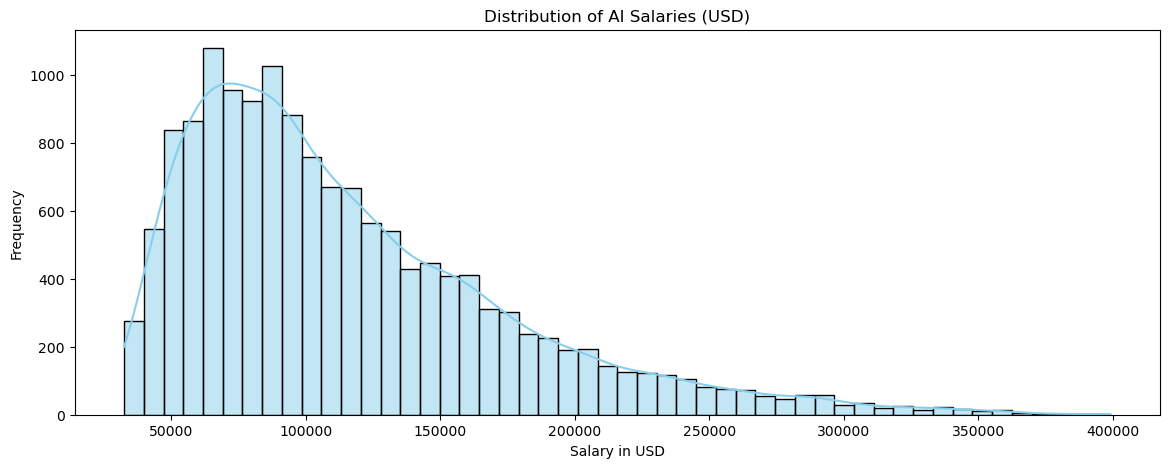

count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: Salary_USD, dtype: float64


In [121]:
plt.figure(figsize=(14,5))
sns.histplot(df['Salary_USD'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of AI Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

print(df['Salary_USD'].describe())

#### 🔍 *2. What is the typical experience required for AI roles? Are most jobs for juniors, mid-levels, or seniors?*

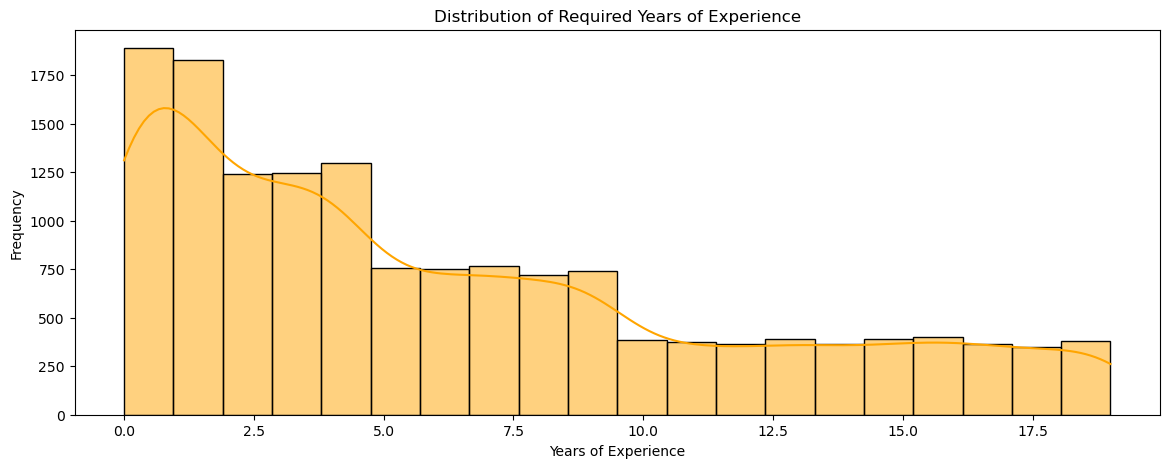

count    15000.000000
mean         6.253200
std          5.545768
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         19.000000
Name: Years_Experience, dtype: float64


In [122]:
plt.figure(figsize=(14,5))
sns.histplot(df['Years_Experience'], bins=20, kde=True, color='orange')
plt.title('Distribution of Required Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

print(df['Years_Experience'].describe())

#### 🔍 *3. How are companies rating their job benefits for AI roles? Is there a consistent scoring trend?*

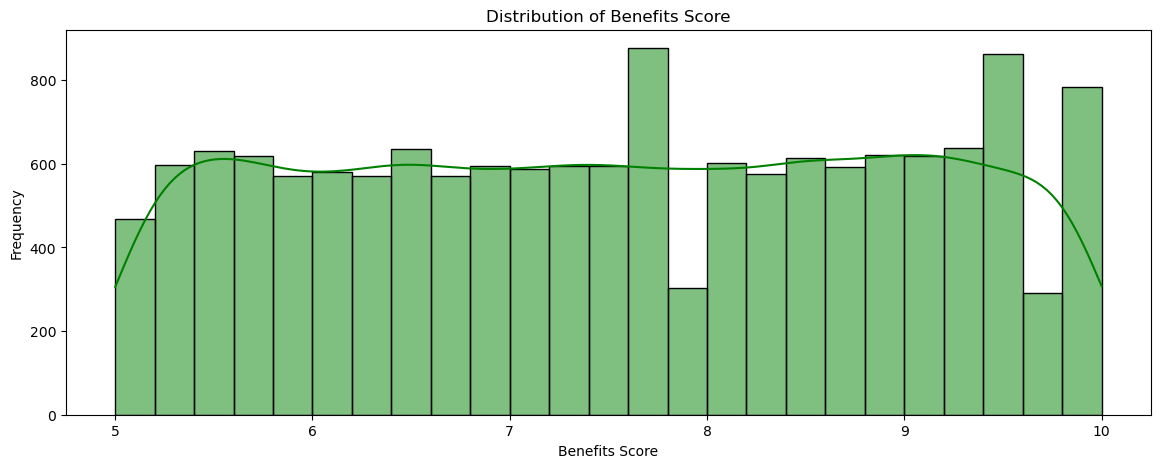

count    15000.000000
mean         7.504273
std          1.450870
min          5.000000
25%          6.200000
50%          7.500000
75%          8.800000
max         10.000000
Name: Benefits_Score, dtype: float64


In [123]:
plt.figure(figsize=(14,5))
sns.histplot(df['Benefits_Score'], bins=25, kde=True, color='green')
plt.title('Distribution of Benefits Score')
plt.xlabel('Benefits Score')
plt.ylabel('Frequency')
plt.show()

print(df['Benefits_Score'].describe())

#### 🔍 *4. How much time do companies typically allow for job applications? Are deadlines tight or relaxed?*

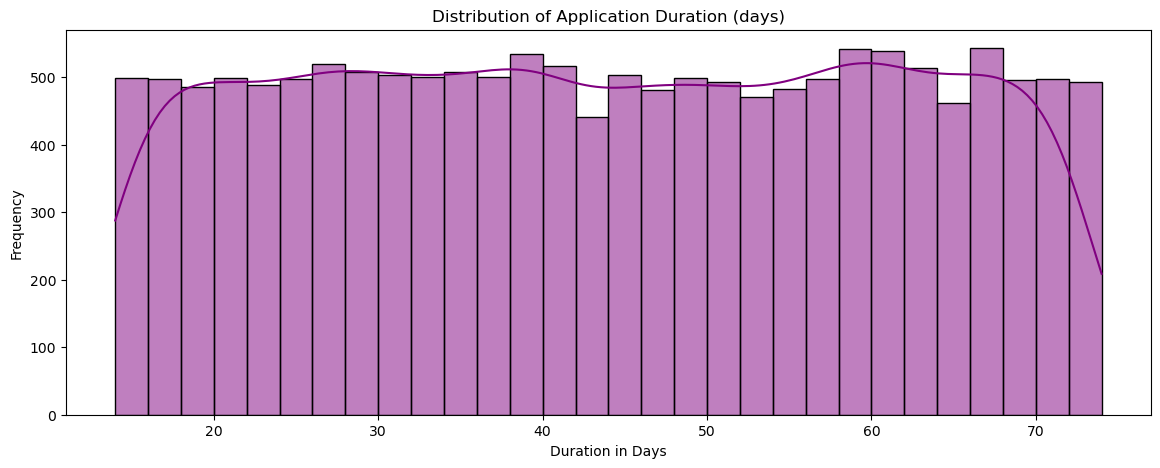

count    15000.000000
mean        43.546200
std         17.325134
min         14.000000
25%         29.000000
50%         44.000000
75%         59.000000
max         74.000000
Name: Application_Duration, dtype: float64


In [124]:
plt.figure(figsize=(14,5))
sns.histplot(df['Application_Duration'], bins=30, kde=True, color='purple')
plt.title('Distribution of Application Duration (days)')
plt.xlabel('Duration in Days')
plt.ylabel('Frequency')
plt.show()

print(df['Application_Duration'].describe())

#### *Univariate Analysis - CategoricalVariable*

In [125]:
categorical = [
    'Job_Title', 'Experience_Level', 'Employment_Type', 'Company_Size',
    'Education_Required', 'Industry', 'Company_Name', 'Application_Duration_Category'
]

#### 🔍 *5.What are the most common job titles in AI roles?*

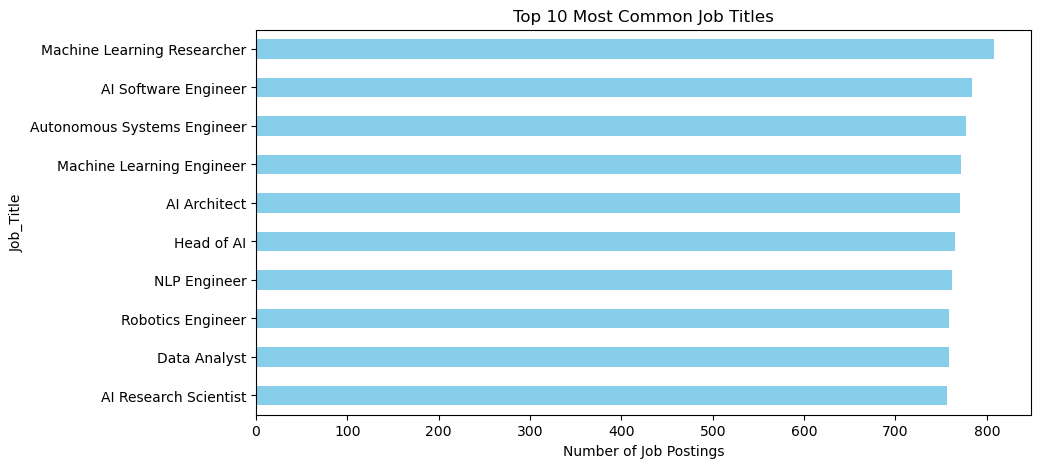

In [126]:
df['Job_Title'].value_counts().head(10).plot(kind='barh', figsize=(10,5), color='skyblue')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Job Postings')
plt.gca().invert_yaxis()
plt.show()

#### 🔍 *6. How is experience level distributed?*

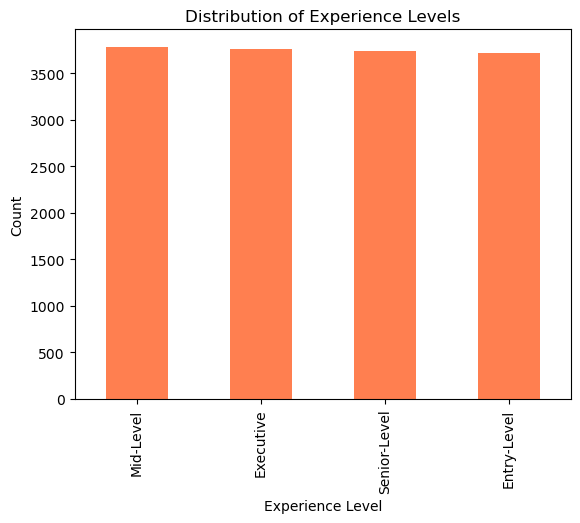

In [127]:
df['Experience_Level'].value_counts().plot(kind='bar', color='coral')
plt.title('Distribution of Experience Levels')
plt.ylabel('Count')
plt.xlabel('Experience Level')
plt.show()

#### 🔍 *7. What are the dominant employment types in the AI market?*

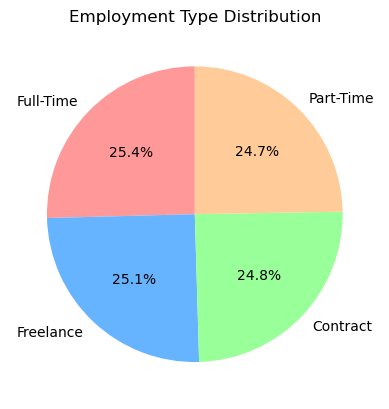

In [128]:
df['Employment_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Employment Type Distribution')
plt.ylabel('')
plt.show()

#### 🔍 *8. How is company size represented?*

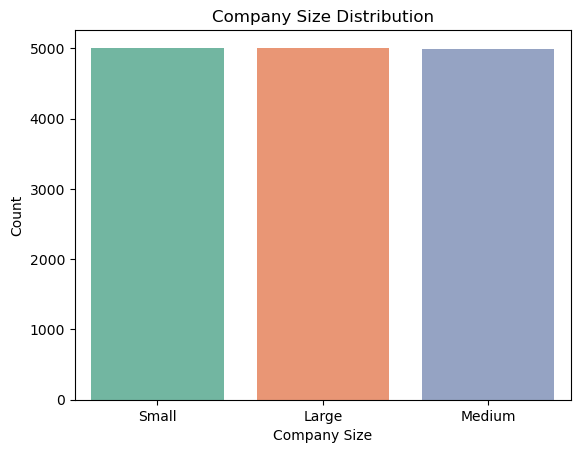

In [129]:
sns.countplot(data=df, x='Company_Size', order=df['Company_Size'].value_counts().index, palette='Set2')
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

#### 🔍 *9. What education levels are most demanded?*

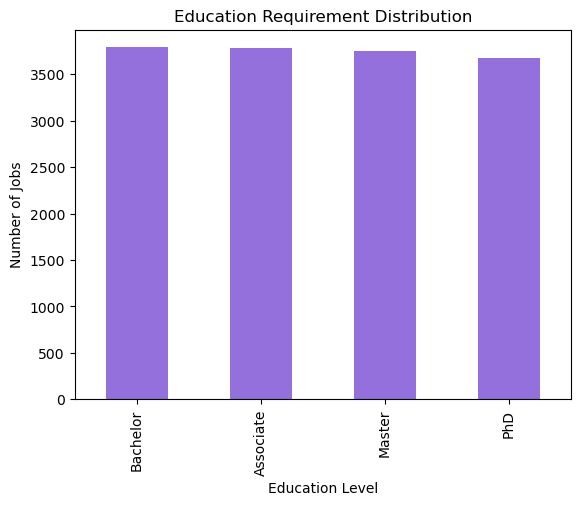

In [130]:
df['Education_Required'].value_counts().plot(kind='bar', color='mediumpurple')
plt.title('Education Requirement Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Jobs')
plt.show()

#### 🔍 *10. Which industries are hiring the most for AI roles?*

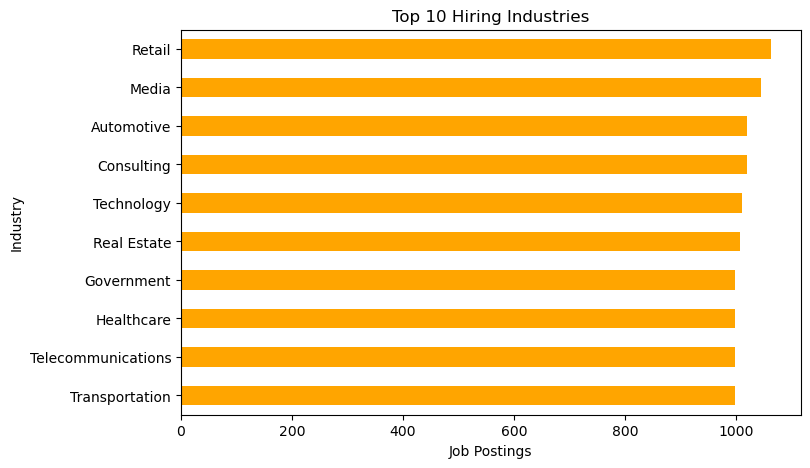

In [131]:
df['Industry'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color='orange')
plt.title('Top 10 Hiring Industries')
plt.xlabel('Job Postings')
plt.gca().invert_yaxis()
plt.show()

#### 🔍*11. Which companies are leading in AI job postings?*

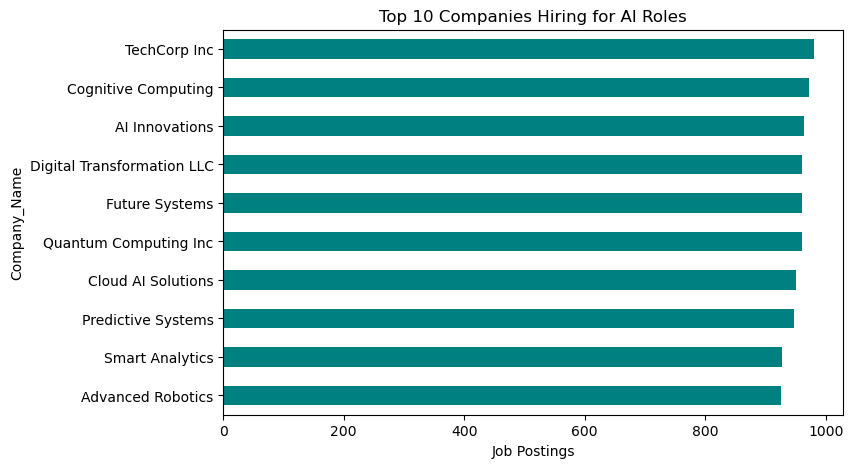

In [132]:
df['Company_Name'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color='teal')
plt.title('Top 10 Companies Hiring for AI Roles')
plt.xlabel('Job Postings')
plt.gca().invert_yaxis()
plt.show()

#### 🔍 *12. How long are companies keeping applications open?*

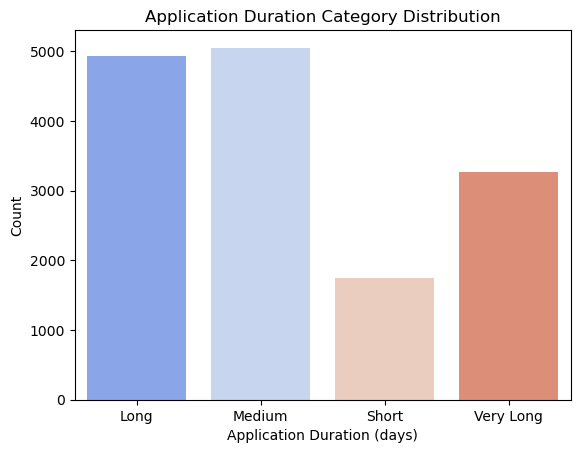

In [133]:
sns.countplot(data=df, x='Application_Duration_Category', palette='coolwarm', order=sorted(df['Application_Duration_Category'].unique()))
plt.title('Application Duration Category Distribution')
plt.xlabel('Application Duration (days)')
plt.ylabel('Count')
plt.show()

#### *Univariate Analysis - CategoricalVariable*

In [134]:
count = ['Company_Location', 'Employee_Residence']

#### 🔍*13. Which countries have the most AI job postings*

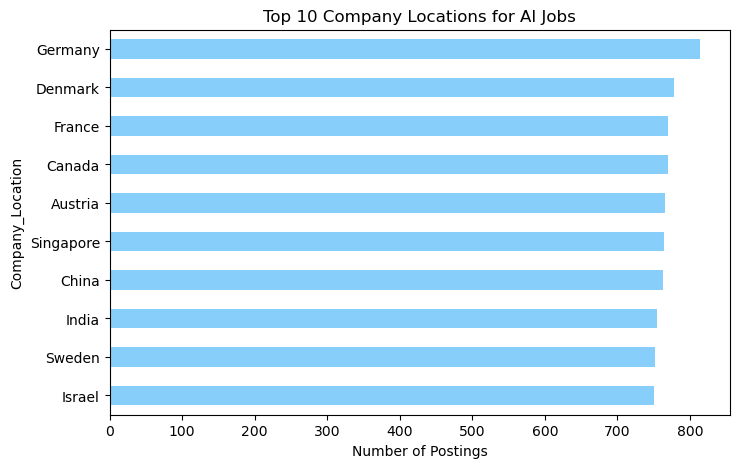

In [135]:
df['Company_Location'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color='lightskyblue')
plt.title('Top 10 Company Locations for AI Jobs')
plt.xlabel('Number of Postings')
plt.gca().invert_yaxis()
plt.show()

#### 🔍 *14. From where are most employees working*

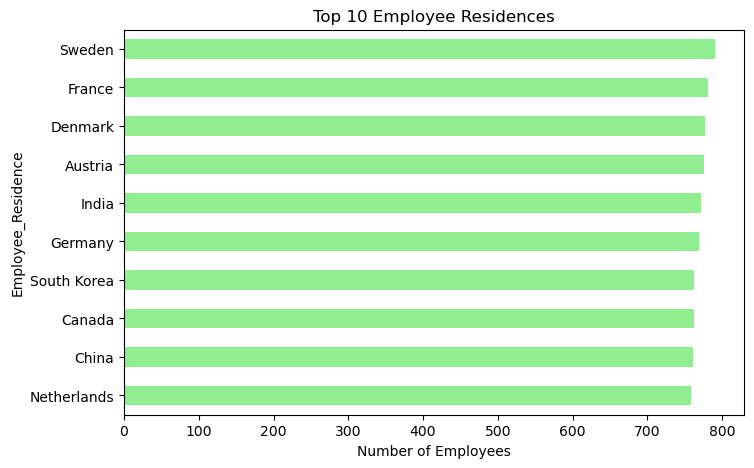

In [136]:
df['Employee_Residence'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color='lightgreen')
plt.title('Top 10 Employee Residences')
plt.xlabel('Number of Employees')
plt.gca().invert_yaxis()
plt.show()

#### *Univariate Analysis - Time Columns*

In [137]:
time = ['Posting_Date', 'Application_Deadline', 'Posting_Month', 'Application_Month']

#### 🔍 *15. How has AI job posting activity varied over time?*

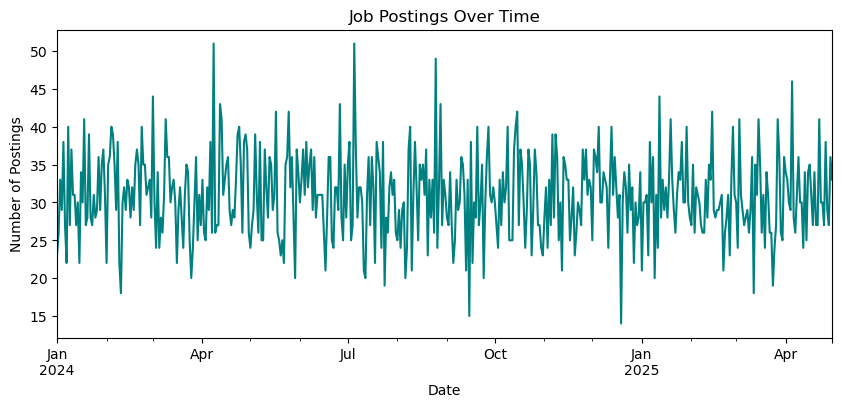

In [138]:
df['Posting_Date'] = pd.to_datetime(df['Posting_Date'])
posting_trend = df['Posting_Date'].value_counts().sort_index()
posting_trend.plot(figsize=(10,4), title='Job Postings Over Time', color='teal')
plt.ylabel('Number of Postings')
plt.xlabel('Date')
plt.show()

#### 🔍*16. Do deadlines follow any time patterns?*

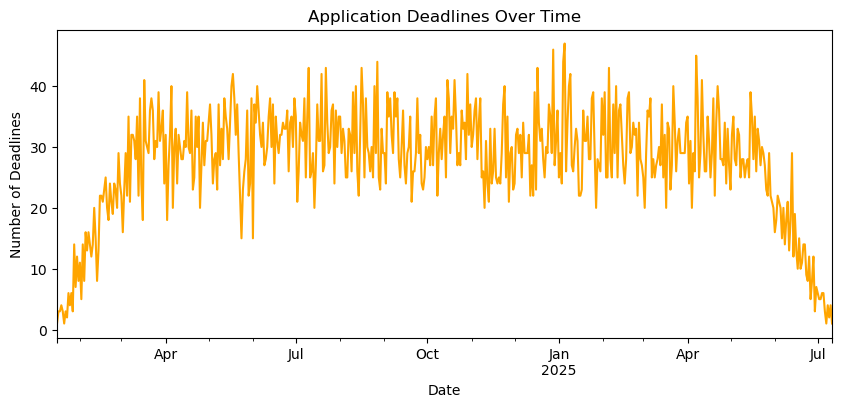

In [139]:
df['Application_Deadline'] = pd.to_datetime(df['Application_Deadline'])
deadline_trend = df['Application_Deadline'].value_counts().sort_index()
deadline_trend.plot(figsize=(10,4), title='Application Deadlines Over Time', color='orange')
plt.ylabel('Number of Deadlines')
plt.xlabel('Date')
plt.show()

#### 🔍 *17. Which months saw the most job postings?*

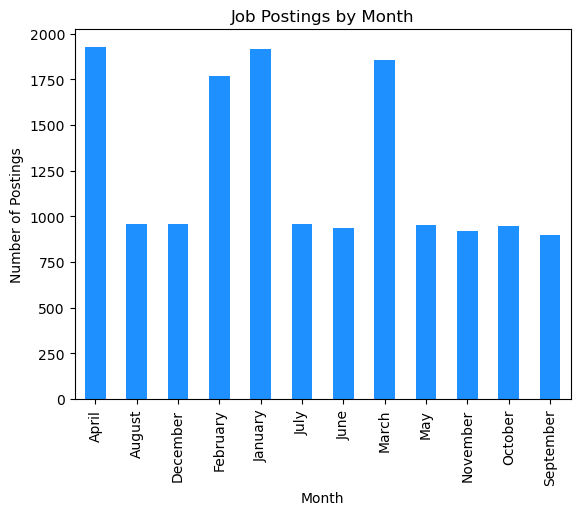

In [140]:
df['Posting_Month'].value_counts().sort_index().plot(kind='bar', color='dodgerblue')
plt.title('Job Postings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.show()

#### 🔍*18. Which months had the most application deadlines?*

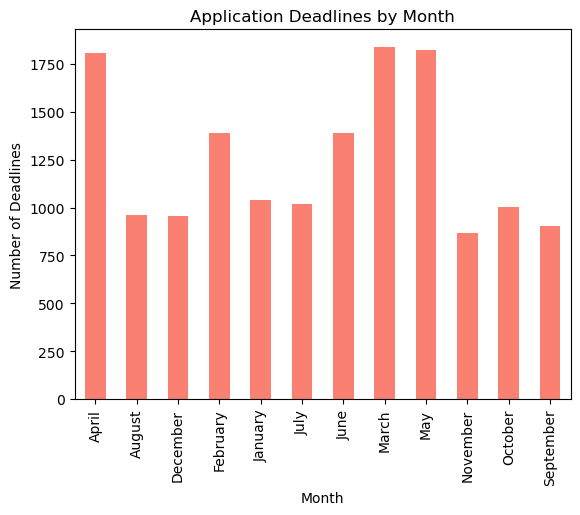

In [141]:
df['Application_Month'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Application Deadlines by Month')
plt.xlabel('Month')
plt.ylabel('Number of Deadlines')
plt.show()

#### *Univariate Analysis - special case Columns*

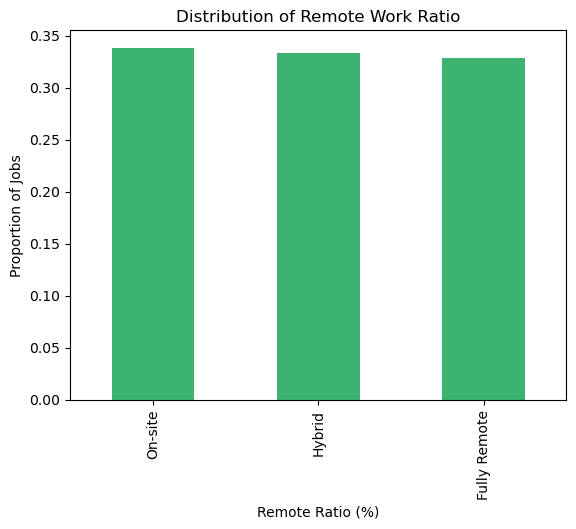

In [142]:
# Check distribution of remote_ratio values
df['Remote_Ratio'].value_counts(normalize=True).plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Remote Work Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Proportion of Jobs')
plt.show()

#### *Univariate Analysis - Text Columns*

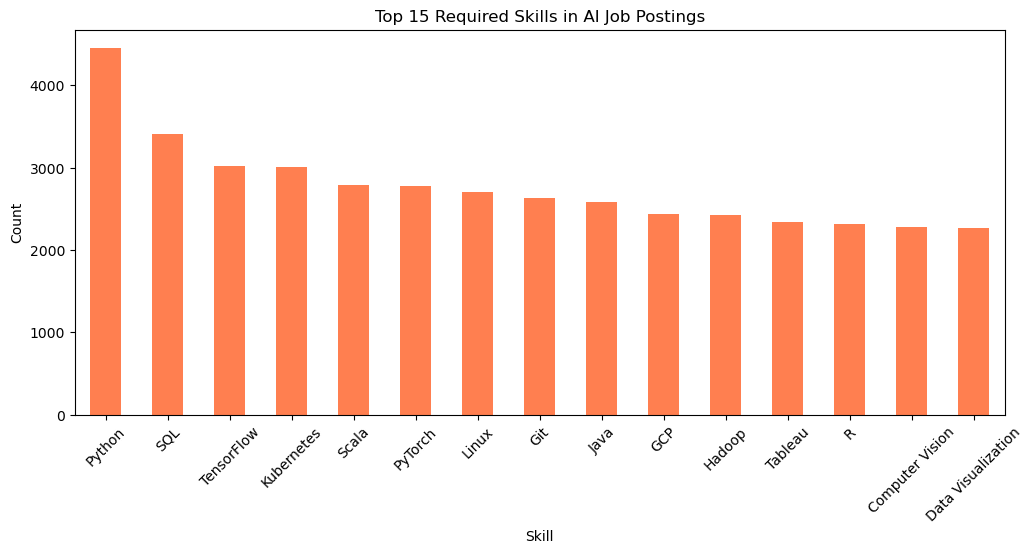

In [143]:
# Assuming skills are comma-separated strings
skills_series = df['Required_Skills'].dropna().str.split(',')

all_skills = [skill.strip() for sublist in skills_series for skill in sublist]

skill_counts = Counter(all_skills)

# Show top 15 skills
top_skills = skill_counts.most_common(15)

skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

skills_df.plot.bar(x='Skill', y='Count', legend=False, figsize=(12,5), color='coral')
plt.title('Top 15 Required Skills in AI Job Postings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### *Bivariate Analysis*

#### 🔍 *1. How does salary vary by experience level?*

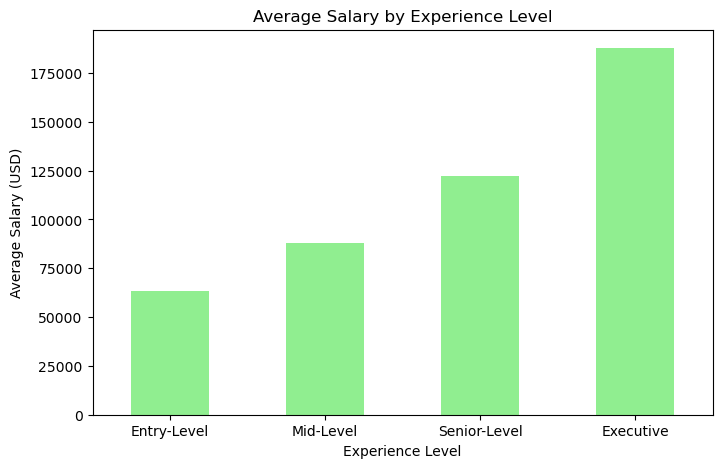

In [144]:
# Group average salary by experience level
avg_salary_exp = df.groupby('Experience_Level')['Salary_USD'].mean().sort_values()

avg_salary_exp.plot(kind='bar', color='lightgreen', figsize=(8, 5))
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.show()

#### 🔍 *2. How does company size affect salary?*

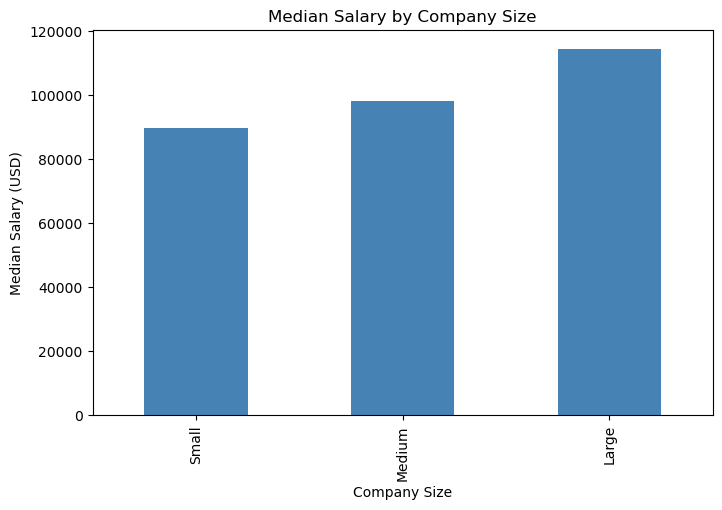

In [145]:
# Median salary grouped by company size
median_salary_company = df.groupby('Company_Size')['Salary_USD'].median().sort_values()

median_salary_company.plot(kind='bar', color='steelblue', figsize=(8, 5))
plt.title('Median Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Median Salary (USD)')
plt.show()

#### 🔍 *3. How does remote flexibility (Remote Ratio) impact salary?*

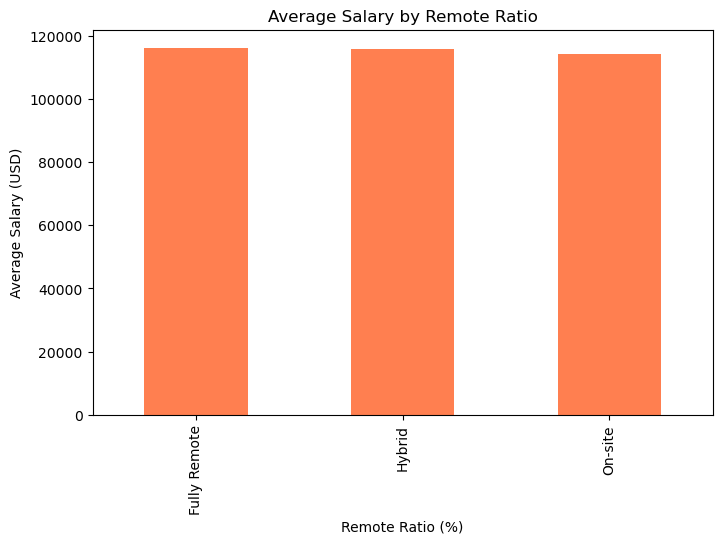

In [146]:
df.groupby('Remote_Ratio')['Salary_USD'].mean().plot(kind='bar', color='coral', figsize=(8, 5))
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Average Salary (USD)')
plt.show()

#### 🔍 *4. Which employment types offer the highest salaries?*

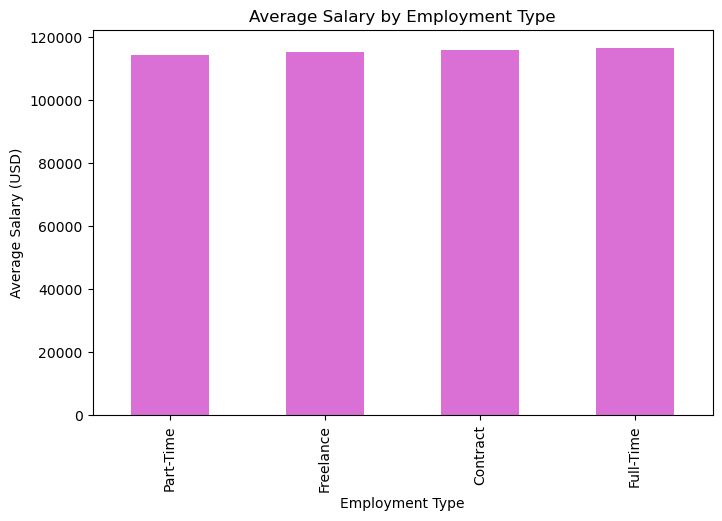

In [147]:
df.groupby('Employment_Type')['Salary_USD'].mean().sort_values().plot(kind='bar', color='orchid', figsize=(8, 5))
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

#### 🔍 *5. What’s the average salary for different education requirements?*

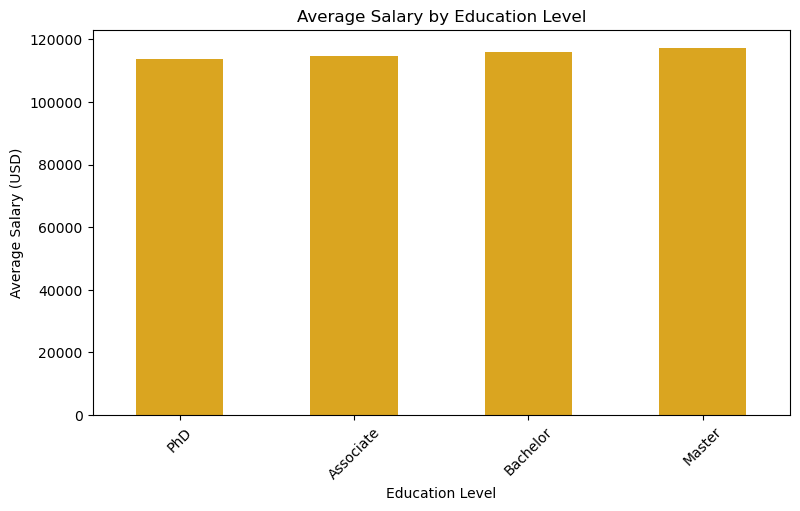

In [148]:
df.groupby('Education_Required')['Salary_USD'].mean().sort_values().plot(kind='bar', color='goldenrod', figsize=(9, 5))
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

#### 🔍 *6. Do different industries pay significantly different salaries?*

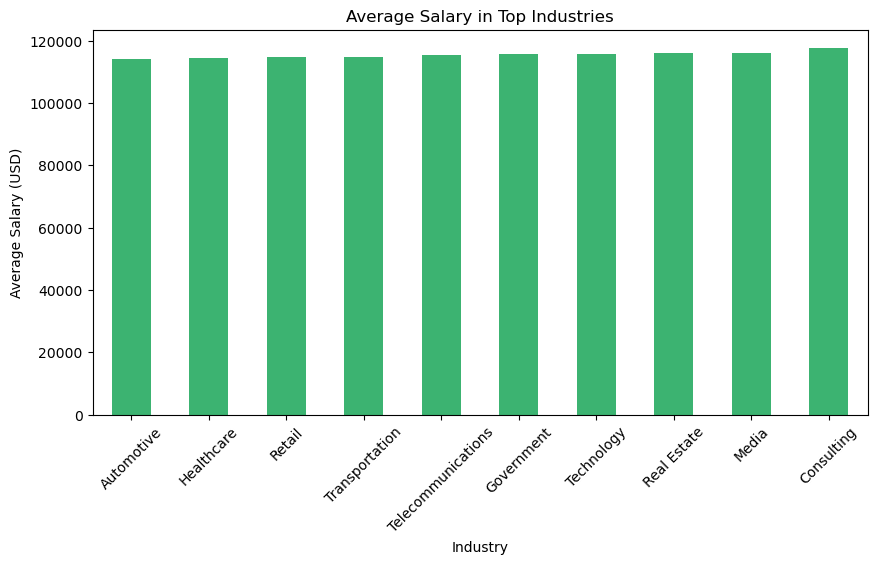

In [149]:
top_industries = df['Industry'].value_counts().head(10).index
filtered = df[df['Industry'].isin(top_industries)]

filtered.groupby('Industry')['Salary_USD'].mean().sort_values().plot(kind='bar', color='mediumseagreen', figsize=(10, 5))
plt.title('Average Salary in Top Industries')
plt.xlabel('Industry')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

#### 🔍 *7. What’s the relationship between benefits score and salary?*

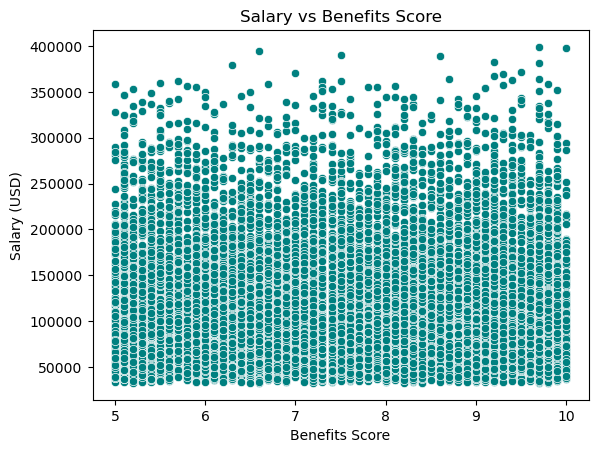

In [150]:
sns.scatterplot(data=df, x='Benefits_Score', y='Salary_USD', color='teal')
plt.title('Salary vs Benefits Score')
plt.xlabel('Benefits Score')
plt.ylabel('Salary (USD)')
plt.show()

#### 🔍 *8. Is salary influenced by years of experience?*

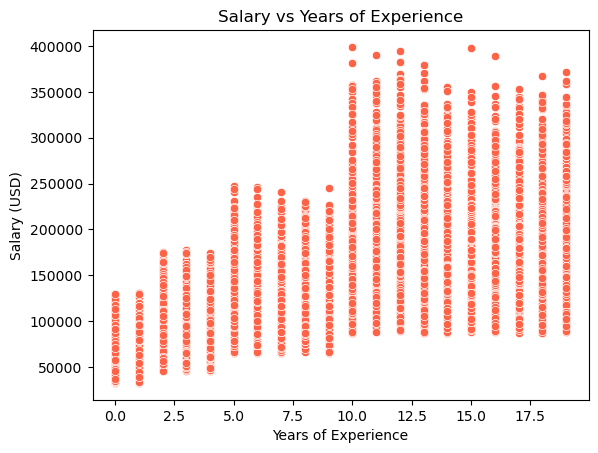

In [151]:
sns.scatterplot(data=df, x='Years_Experience', y='Salary_USD', color='tomato')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.show()

#### 🔍 *9. How does remote ratio relate to employment type?*

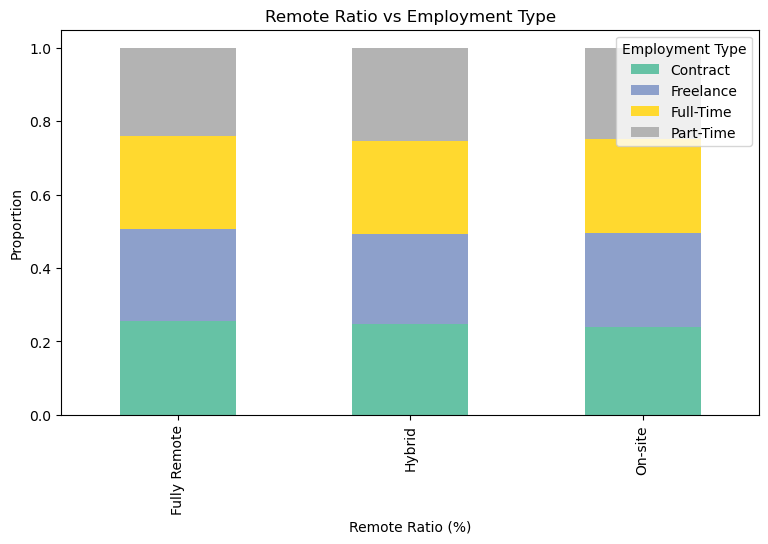

In [152]:
ct = pd.crosstab(df['Remote_Ratio'], df['Employment_Type'], normalize='index')
ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(9, 5))
plt.title('Remote Ratio vs Employment Type')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Proportion')
plt.legend(title='Employment Type')
plt.show()

#### 🔍 *10. How are experience levels distributed across company sizes?*

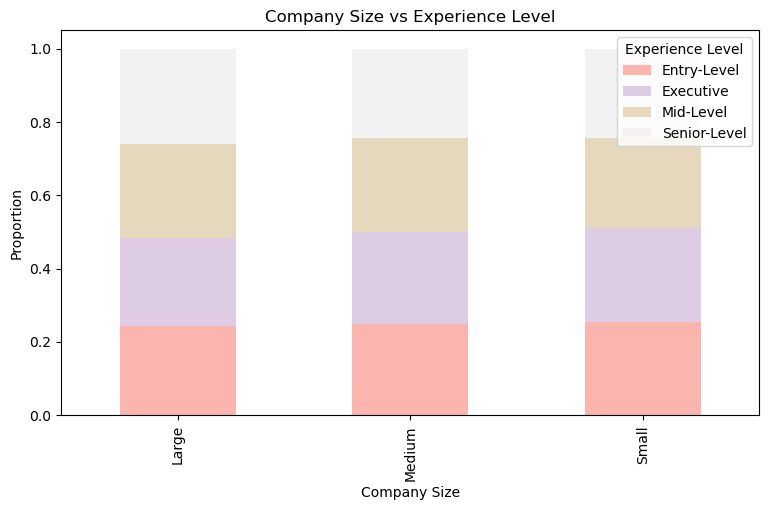

In [153]:
ct = pd.crosstab(df['Company_Size'], df['Experience_Level'], normalize='index')
ct.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(9, 5))
plt.title('Company Size vs Experience Level')
plt.xlabel('Company Size')
plt.ylabel('Proportion')
plt.legend(title='Experience Level')
plt.show()

#### 🔍 *11. What are the most frequently required skills for AI jobs?*

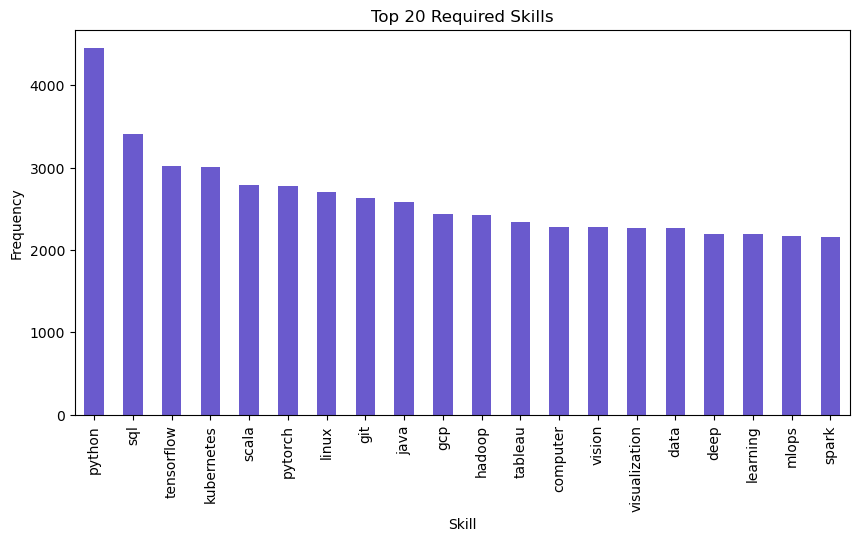

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

skills = df['Required_Skills'].dropna()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(skills)

skill_counts = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out()).sort_values(ascending=False)
skill_counts.head(20).plot(kind='bar', color='slateblue', figsize=(10, 5))
plt.title('Top 20 Required Skills')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.show()

#### *Multivariate Analysis*

#### 🔍 *1. How do required skills and experience level together influence average salary?*

<Figure size 1400x800 with 0 Axes>

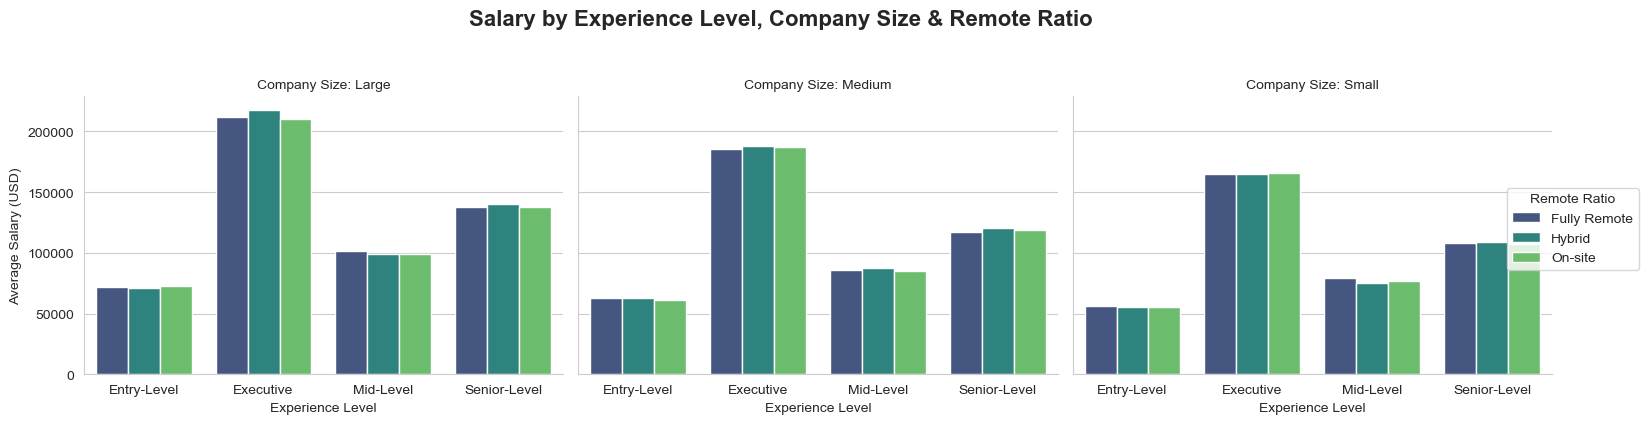

In [155]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create pivot table with all three factors
pivot = df.pivot_table(
    values='Salary_USD',
    index=['Experience_Level', 'Company_Size'],
    columns='Remote_Ratio',
    aggfunc='mean'
).stack().reset_index(name='Avg_Salary')

# Create a faceted bar plot
g = sns.FacetGrid(
    pivot, 
    col='Company_Size',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)
g.map_dataframe(
    sns.barplot,
    x='Experience_Level',
    y='Avg_Salary',
    hue='Remote_Ratio',
    palette='viridis',
    errorbar=None
)

# Customize the plot
g.set_titles("Company Size: {col_name}")
g.set_axis_labels("Experience Level", "Average Salary (USD)")
g.fig.suptitle(
    'Salary by Experience Level, Company Size & Remote Ratio',
    y=1.05,
    fontsize=16,
    fontweight='bold'
)

# Adjust legend (without value annotations)
g.add_legend(
    title='Remote Ratio',
    bbox_to_anchor=(1.05, 0.5),
    frameon=True
)

plt.tight_layout()
plt.show()

#### 🔍 *2. Which combinations of job title and education level lead to higher salaries? (Top roles only)*

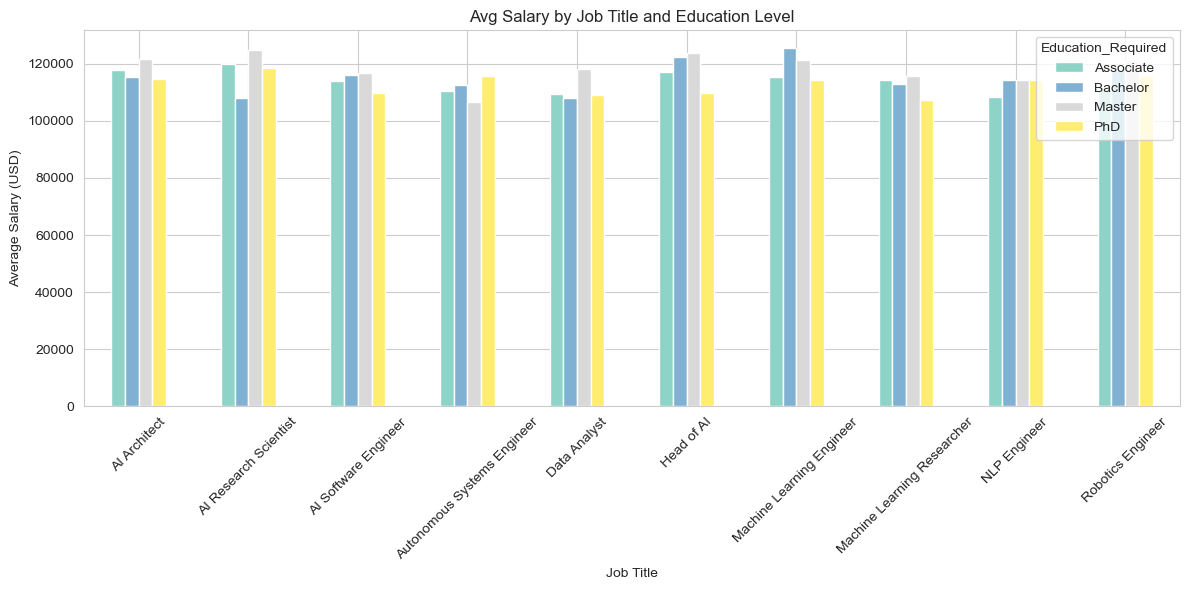

In [156]:
top_titles = df['Job_Title'].value_counts().head(10).index
filtered = df[df['Job_Title'].isin(top_titles)]

grouped = filtered.groupby(['Job_Title', 'Education_Required'])['Salary_USD'].mean().unstack()
grouped.plot(kind='bar', figsize=(12,6), colormap='Set3')
plt.title('Avg Salary by Job Title and Education Level')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 🔍 *3. How does company size, employment type, and remote ratio interact?*

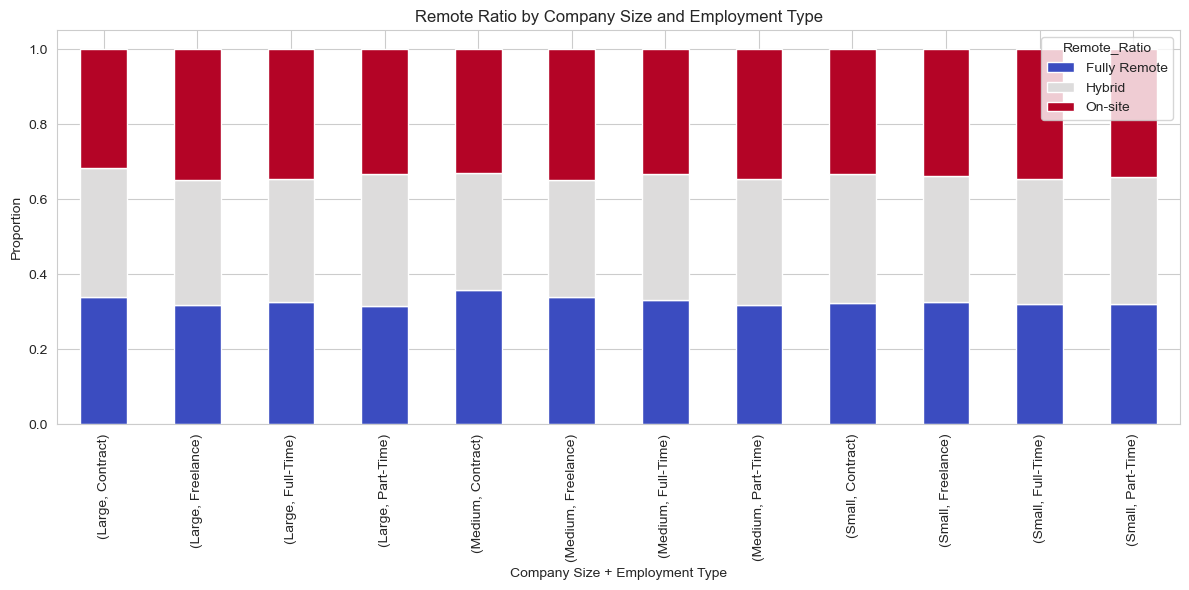

In [157]:
ct = pd.crosstab(
    [df['Company_Size'], df['Employment_Type']],
    df['Remote_Ratio'],
    normalize='index'
)

ct.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title('Remote Ratio by Company Size and Employment Type')
plt.xlabel('Company Size + Employment Type')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

#### 🔍 *4. How do required skills and experience level together influence average salary?*

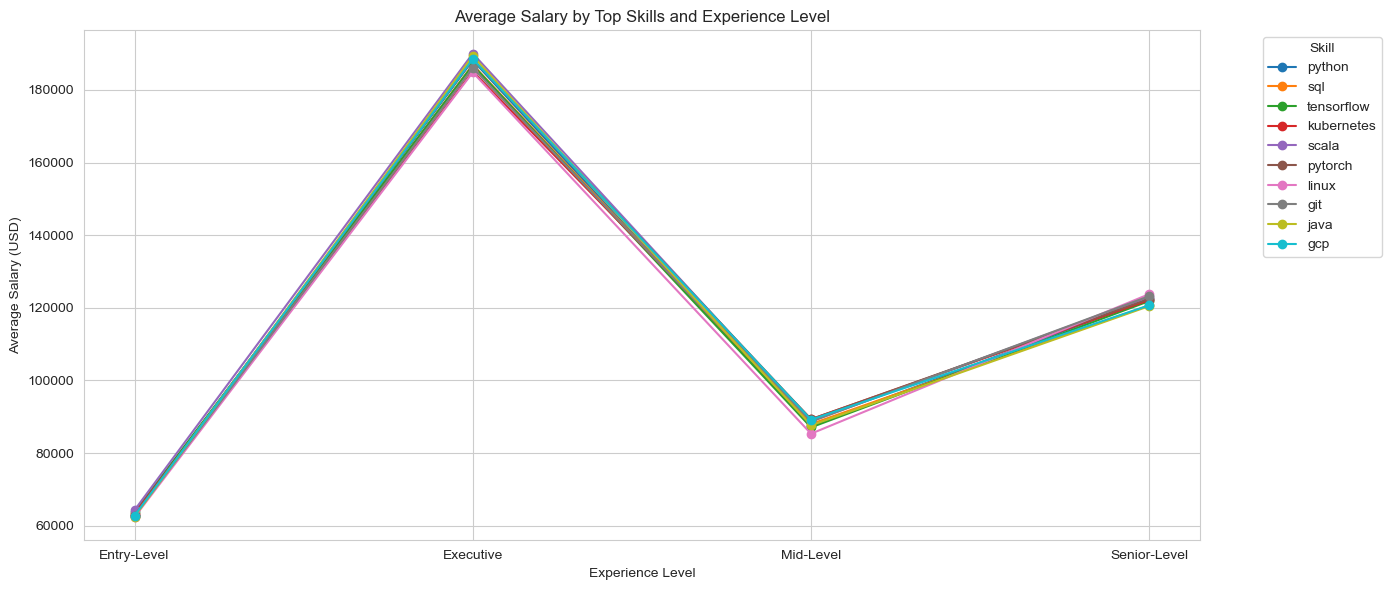

In [158]:
# Step 1: Extract all skills and count their frequencies (manual alternative to CountVectorizer)
all_skills = df['Required_Skills'].str.lower().str.split(',|;|and|&').explode().str.strip()
skill_counts = all_skills.value_counts()

# Get top 10 skills
top_skills = skill_counts.head(10).index.tolist()

# Step 2: Add binary columns for each top skill
for skill in top_skills:
    df[skill] = df['Required_Skills'].str.lower().str.contains(skill.lower(), na=False).astype(int)

# Step 3: Group by experience level and calculate average salary for each skill
plt.figure(figsize=(14, 6))

for skill in top_skills:
    # Calculate average salary by experience level for jobs requiring this skill
    avg_salary = df[df[skill] == 1].groupby('Experience_Level')['Salary_USD'].mean()
    plt.plot(avg_salary.index, avg_salary.values, label=skill, marker='o')

plt.title('Average Salary by Top Skills and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Skill', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 🔍 *5. Which industries offer the best salary for each employment type?*

Top-paying industries for each employment type:
  Employment_Type Best_Paying_Industry  Highest_Salary_USD
0        Contract            Education       121857.403162
1       Freelance           Government       120943.968000
2       Full-Time          Real Estate       121854.028674
3       Part-Time        Manufacturing       121387.544304


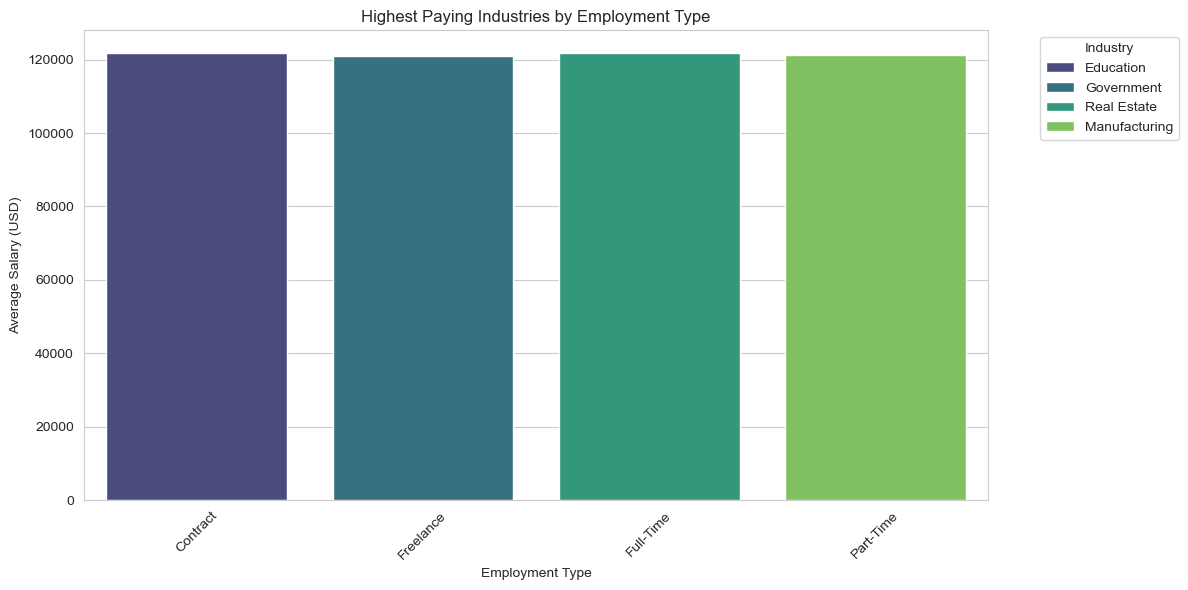

In [159]:
# Pivot table: Avg salary per industry for each employment type
pivot = df.pivot_table(
    values='Salary_USD',
    index='Industry',
    columns='Employment_Type',
    aggfunc='mean'
)

# Find the top-paying industry for each employment type
best_industries = pivot.idxmax().reset_index()
best_industries.columns = ['Employment_Type', 'Best_Paying_Industry']

# Get their corresponding salaries
best_salaries = pivot.max().reset_index()
best_salaries.columns = ['Employment_Type', 'Highest_Salary_USD']

# Combine results
result = pd.merge(best_industries, best_salaries, on='Employment_Type')

print("Top-paying industries for each employment type:")
print(result)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    data=result,
    x='Employment_Type',
    y='Highest_Salary_USD',
    hue='Best_Paying_Industry',
    palette='viridis'
)
plt.title('Highest Paying Industries by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 🔍 *6. Do posting/application months affect salary across job roles?*

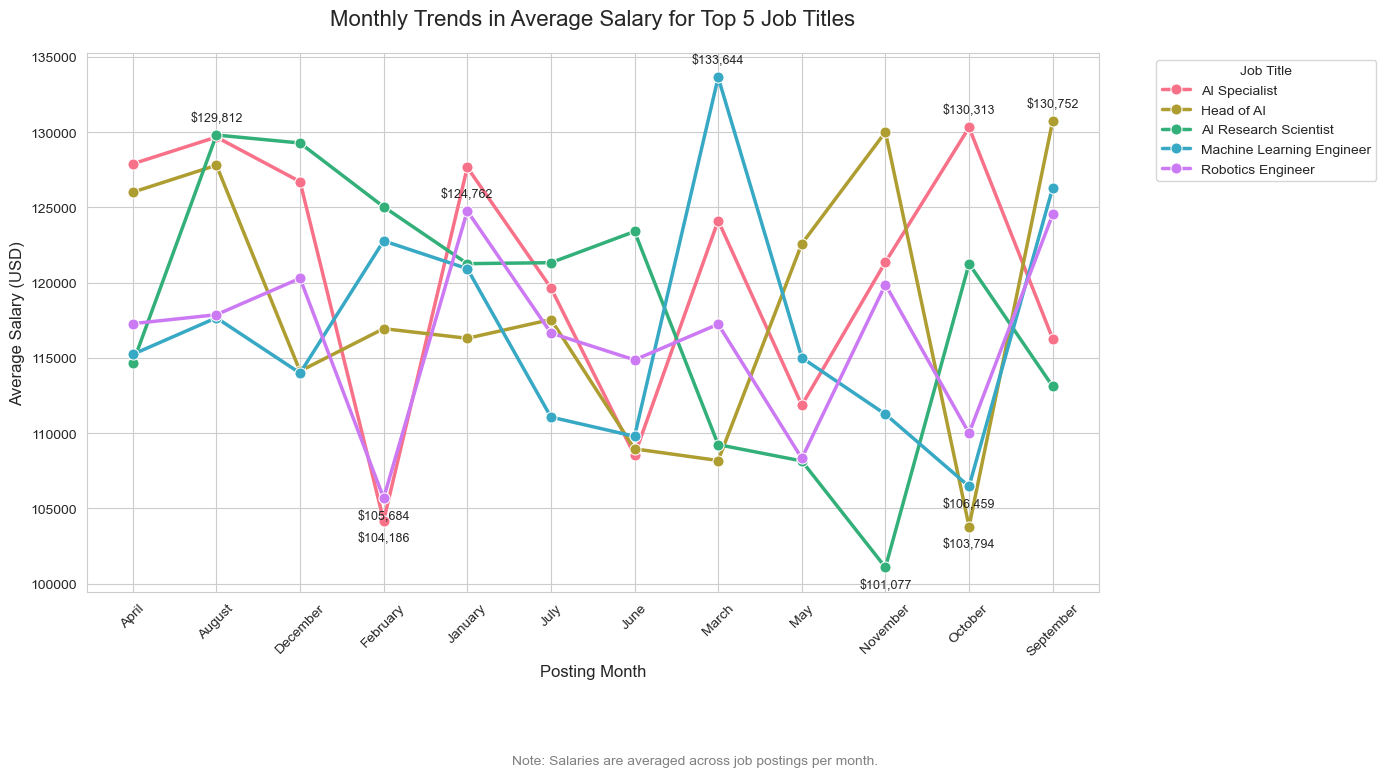

In [160]:
# Group data by month and job title, then calculate mean salary
monthly_salary = df.groupby(['Posting_Month', 'Job_Title'])['Salary_USD'].mean().unstack().fillna(0)

# Select top 5 highest-paying job titles (or most frequent)
top_jobs = monthly_salary.mean().nlargest(5).index  # Alternative: .sum() for most frequent
monthly_salary = monthly_salary[top_jobs]

# --- Data Visualization ---
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")  # Clean background with grid
palette = sns.color_palette("husl", n_colors=len(top_jobs))  # Vibrant color palette

# Line Plot (Trend Analysis)
sns.lineplot(
    data=monthly_salary.reset_index().melt(id_vars='Posting_Month'),
    x='Posting_Month',
    y='value',
    hue='Job_Title',
    palette=palette,
    linewidth=2.5,
    marker='o',  # Add markers for each data point
    markersize=8
)

# Enhancements
plt.title('Monthly Trends in Average Salary for Top 5 Job Titles', fontsize=16, pad=20)
plt.xlabel('Posting Month', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-labels for readability
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Add data labels for the highest and lowest points
for job in top_jobs:
    max_salary = monthly_salary[job].max()
    min_salary = monthly_salary[job].min()
    max_month = monthly_salary[job].idxmax()
    min_month = monthly_salary[job].idxmin()
    
    plt.annotate(f"${max_salary:,.0f}", 
                 (max_month, max_salary),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=9)
    
    plt.annotate(f"${min_salary:,.0f}", 
                 (min_month, min_salary),
                 textcoords="offset points",
                 xytext=(0,-15),
                 ha='center',
                 fontsize=9)

# Add a footnote for context
plt.figtext(0.5, -0.1, 
            "Note: Salaries are averaged across job postings per month.", 
            ha="center",
            fontsize=10,
            color='gray')

plt.tight_layout()
plt.show()

#### 🔍 *7. How do application duration categories vary by experience level and education?*

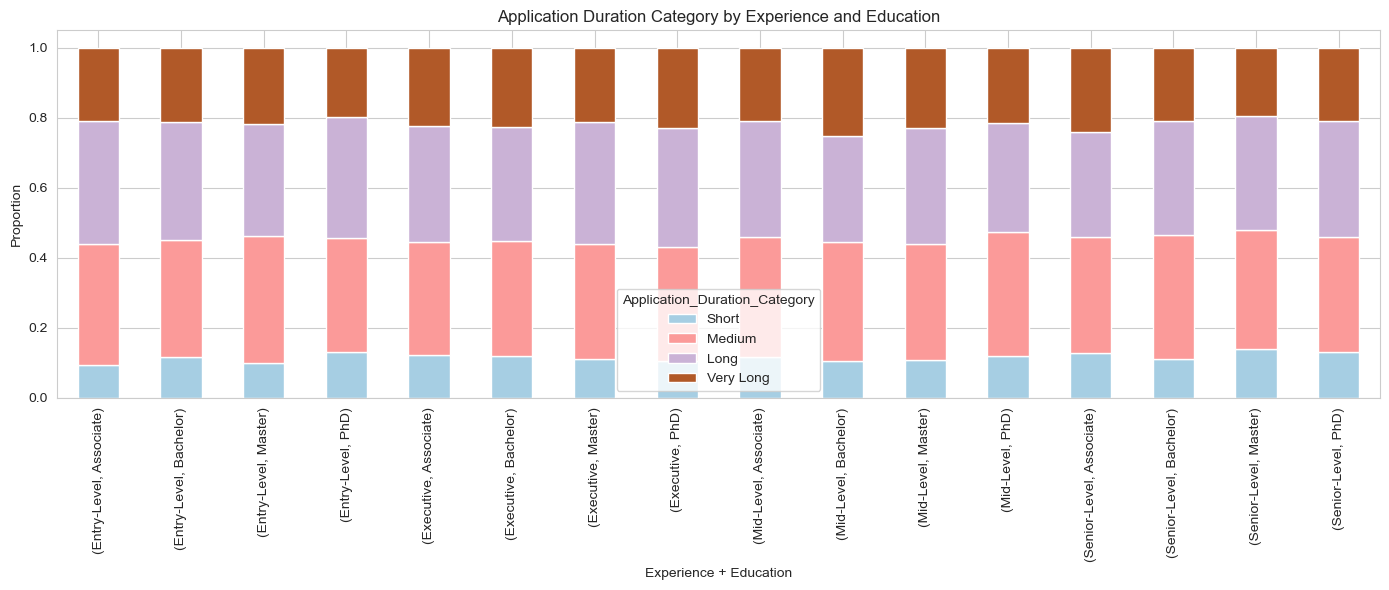

In [161]:
ct = pd.crosstab(
    [df['Experience_Level'], df['Education_Required']],
    df['Application_Duration_Category'],
    normalize='index'
)

ct.plot(kind='bar', stacked=True, colormap='Paired', figsize=(14,6))
plt.title('Application Duration Category by Experience and Education')
plt.xlabel('Experience + Education')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()